Датасет `data.csv` містить дані про кредитування. Цільовою змінною є `loan_status` -- приймає 5 значень:

* *Charged Off* (кредит не повернуто)
* *Late (31-120 days)*
* *Late (16-30 days)* 
* *In Grace Period* 
* *Fully Paid*  

Файл `description.csv` не використовується у завданні, він містить повні назви ознак.

Датасет `predict.csv` не містить значень цільової змінної і призначений для зовнішнього оцінювання.



### 1. Імпортувати датасет data.csv у об'єкт loans і провести попередній аналіз даних засобами pandas, matplotlib, seaborn. Кожен графік чи візуалізація повинен супроводжуватися висновками.



In [126]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import ipywidgets as widgets
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [127]:
loans = pd.read_csv("data.csv")
desc = pd.read_csv("description.csv").set_index("Variable Name")
loans

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,24000,10.49,779.95,B,3 years,MORTGAGE,89000.0,Fully Paid,21.12,1.0,2.0,31.0,8.0,0.0,28137,64.0,19.0,27437.333790,27437.33,24000.00,3359.33,78.0,0.00,0.000,16901.45,1.0,Individual,0.0,0.0,70116.0,43670.0
1,15000,21.49,409.95,D,NaN,RENT,38251.2,Charged Off,30.98,0.0,0.0,NaN,11.0,0.0,5357,24.8,13.0,10687.220000,10687.22,3769.92,5302.70,0.0,1614.60,145.314,409.95,1.0,Individual,0.0,273.0,31306.0,21600.0
2,24000,6.97,740.73,A,2 years,MORTGAGE,92000.0,Fully Paid,16.57,0.0,2.0,NaN,11.0,0.0,8162,11.8,21.0,26148.750000,26148.75,24000.00,2148.75,0.0,0.00,0.000,12074.88,0.0,Individual,0.0,0.0,196318.0,68900.0
3,6500,19.22,238.99,D,4 years,MORTGAGE,25000.0,Charged Off,9.70,0.0,0.0,NaN,5.0,0.0,6848,41.0,7.0,7565.000000,7565.00,5313.58,2109.37,15.0,127.05,22.869,238.99,0.0,Individual,0.0,0.0,6848.0,16700.0
4,20000,11.22,656.86,B,10+ years,OWN,58000.0,Fully Paid,16.59,0.0,1.0,36.0,13.0,0.0,11831,45.3,18.0,20088.830000,20088.83,20000.00,88.83,0.0,0.00,0.000,20101.30,0.0,Individual,0.0,0.0,426287.0,26100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19495,26000,14.08,606.06,C,10+ years,MORTGAGE,80000.0,Fully Paid,8.62,0.0,0.0,NaN,9.0,0.0,12978,63.0,30.0,26223.713330,26223.71,26000.00,223.71,0.0,0.00,0.000,26244.05,0.0,Individual,0.0,4812.0,110260.0,20600.0
19496,3000,12.74,100.71,C,10+ years,MORTGAGE,109000.0,Fully Paid,34.29,1.0,0.0,6.0,14.0,0.0,34587,74.2,42.0,3077.051662,3077.05,3000.00,77.05,0.0,0.00,0.000,2978.46,0.0,Individual,0.0,0.0,260585.0,46600.0
19497,17000,11.12,557.53,B,7 years,MORTGAGE,75000.0,Fully Paid,20.77,0.0,1.0,37.0,8.0,0.0,69905,28.3,15.0,20020.680680,19961.80,17000.01,3020.67,0.0,0.00,0.000,2785.60,0.0,Individual,0.0,NaN,NaN,NaN
19498,30000,8.18,942.59,B,7 years,RENT,175000.0,Fully Paid,7.19,2.0,0.0,5.0,5.0,0.0,24516,51.1,12.0,33909.765320,33909.77,30000.00,3909.77,0.0,0.00,0.000,3.80,0.0,Individual,0.0,0.0,88348.0,48000.0


In [3]:
loans.shape

(19500, 31)

Отже, маємо 19 500 об'єктів, 30 ознак і цільову змінну. Подивимось на опис кожної ознаки:

In [147]:
pd.set_option('display.max_colwidth', None)
def get_describe(column):
    return pd.concat([loans[column].describe(), pd.DataFrame(desc.loc[column]).T.rename(columns={"Description":0})]).rename(columns={0:"Description"})
widgets.interact(get_describe, column=widgets.Dropdown(options=loans.columns, description="Column:"))
pd.set_option('display.max_columns', None)

interactive(children=(Dropdown(description='Column:', options=('loan_amnt', 'int_rate', 'installment', 'grade'…

Подивимось на типи даних і ситуцію з пропущеними значеннями:

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19500 entries, 0 to 19499
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   19500 non-null  int64  
 1   int_rate                    19500 non-null  float64
 2   installment                 19500 non-null  float64
 3   grade                       19500 non-null  object 
 4   emp_length                  18281 non-null  object 
 5   home_ownership              19500 non-null  object 
 6   annual_inc                  19500 non-null  float64
 7   loan_status                 19500 non-null  object 
 8   dti                         19495 non-null  float64
 9   delinq_2yrs                 19500 non-null  float64
 10  inq_last_6mths              19500 non-null  float64
 11  mths_since_last_delinq      9868 non-null   float64
 12  open_acc                    19500 non-null  float64
 13  pub_rec                     195

Бачимо, що є пропущені значення. Подивимось на їх кількість і візуалізуємо їх розташування:

In [6]:
loans.isnull().sum()[loans.isnull().sum() != 0]

emp_length                1219
dti                          5
mths_since_last_delinq    9632
revol_util                  14
tot_coll_amt               870
tot_cur_bal                870
total_rev_hi_lim           870
dtype: int64

<Axes: >

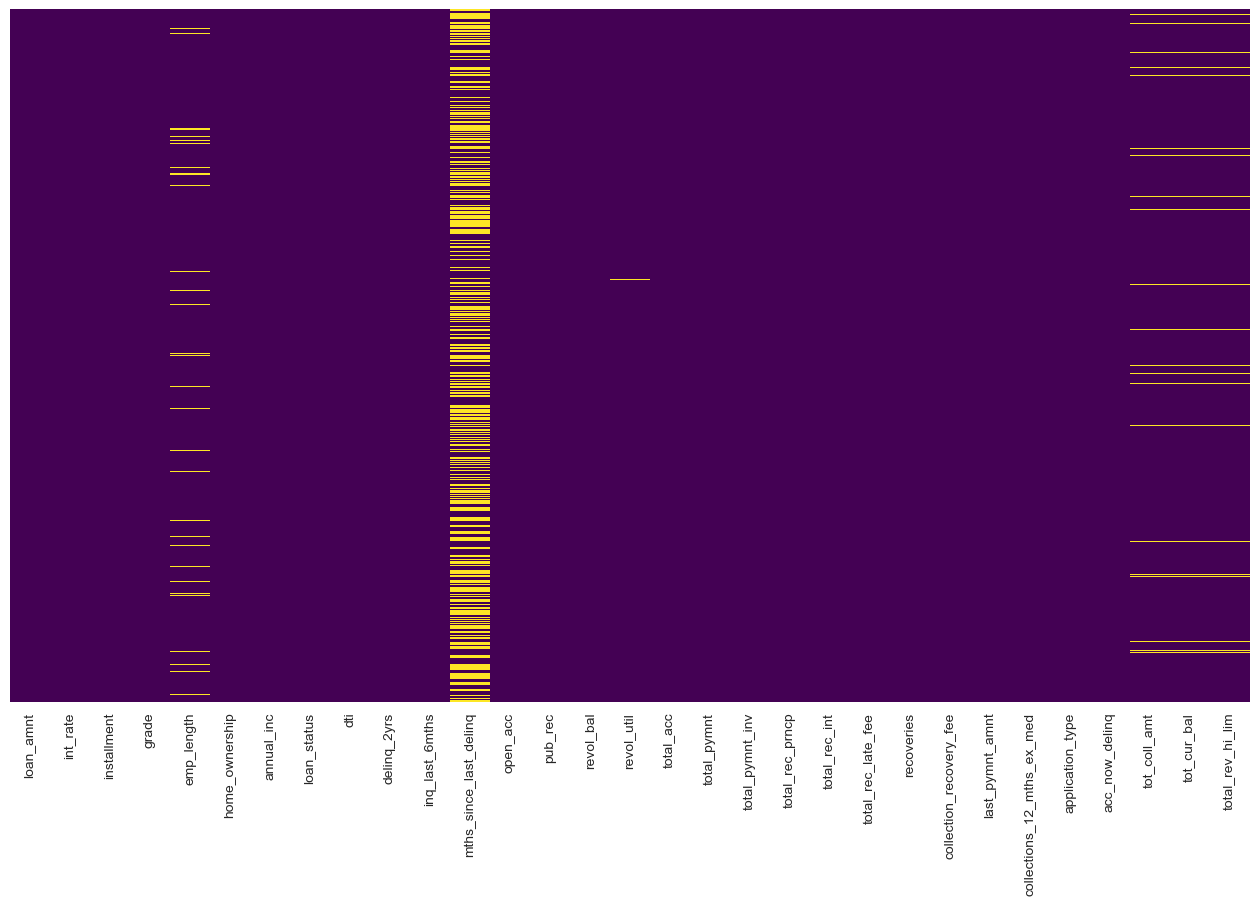

In [7]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(loans.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Як бачимо по loans i heatmap, пропущені значення присутні в 7-ьох різних колонках. Особливо часто вони зустрічаються в колонці `mths_since_last_delinq`, яка показує кількість місяців з моменту останнього прострочення платежу позичальником. Згодом ми будемо вирішувати проблему Null значень.

## Null Handling

#### 1. Видалення інформації з `null` значеннями

Спробуємо видалити стовпець `mths_since_last_delinq`, майже половина якого є null значеннями. Після цього видалимо всі рядки, в яких залишились проущені значення з інших стовців

In [8]:
loans_nonull_v1 = loans.drop(columns=["mths_since_last_delinq"])
loans_nonull_v1 = loans_nonull_v1.dropna().reset_index(drop=True)
print(f"Percentage of data left: {round(loans_nonull_v1.shape[0] / loans.shape[0] * 100, 2)}%")

Percentage of data left: 89.39%


##### Висновок.
Ми видалили всі null значення зазначеним способом. При цьому втратили близько 10% наших об'єктів(рядків) і забрали 1 ознаку(колонку) для всіх об'єктів. Враховуючи величину нашого датасету, ці втрати не є надто великим, тому згодом спробуємо навчати моделі на цьому датасеті

#### 2. Заміна `null` значень різними техніками 

Пройдемось по кожній колонці з пропущеними значеннями і спробуємо замінити їх на найбільш відповідні.

* Ознака `emp_length`: Як можна побачити нижче, тут маємо категорійну ознаку, яку можна перевести в числову зі значеннями від 0 до 10, де значення відповідає кількості років на роботі, а 0 означає < 1 року, а 10 означає >= 10 років


In [9]:
loans["emp_length"].value_counts()

10+ years    6331
2 years      1757
< 1 year     1600
3 years      1558
1 year       1309
5 years      1225
4 years      1135
6 years       918
8 years       890
7 years       831
9 years       727
Name: emp_length, dtype: int64

In [10]:
loans_nonull_v2 = loans.copy()
loans_nonull_v2["emp_length"] = loans_nonull_v2["emp_length"].map(lambda x: x if type(x) == float else 10 if "10+" in x else 0 if "<" in x else x[0]).astype("float64")
loans_nonull_v2["emp_length"].value_counts()


10.0    6331
2.0     1757
0.0     1600
3.0     1558
1.0     1309
5.0     1225
4.0     1135
6.0      918
8.0      890
7.0      831
9.0      727
Name: emp_length, dtype: int64

<Axes: >

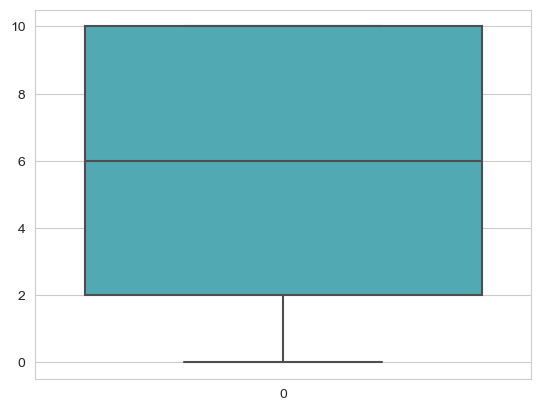

In [11]:
sns.boxplot(loans_nonull_v2["emp_length"], palette="YlGnBu")

Тепер можемо замінити null значення на середнє значення по всій колонці (середнє арфметичне є найбільш відповідним, адже бачимо, що немає викидів)

In [12]:
loans_nonull_v2['emp_length'] = loans_nonull_v2['emp_length'].fillna(loans_nonull_v2['emp_length'].mean())

* Ознаки `dti` і `revol_util`: Тут немає сенсу придумувати, як замінити пропущені значення, адже разом їх менше, ніж `0.1%` від всіх даних. Тому є сенс просто видалити об'єкти з null значеннями в цих стовпцях

In [13]:
loans_nonull_v2 = loans_nonull_v2.dropna(subset=["dti", "revol_util"], how="any").reset_index(drop=True)

* Ознака `mths_since_last_delinq`: Тут є майже 50% пропущених значень, але це не означає, що видалення цієї ознаки є найкращим варіантом. Якщо подивитись на самі дані, то можна припустити, що `null` значення тут відіграють (в основному) роль класу боржників, які ніколи не прострочували платіж (тому не мають кількості місяців з останнього просрочення). 

In [14]:
trn = loans_nonull_v2.apply(lambda row: False if (np.isnan(row["mths_since_last_delinq"]) and row["delinq_2yrs"] != 0) else True, axis=1)
trn.value_counts()

True     19437
False       44
dtype: int64

Тобто є тільки 44 об'єкти, в яких дата останнього прострочення null, а кількість просрочень за останні 2 роки не рівна 0 (справжні пропущені значення). Їх ми видалимо, щоб значення, на які ми замінимо null не були хибними.

In [15]:
loans_nonull_v2.drop(trn[trn==False].index, inplace=True)

Тепер замінимо цю ознаку на категорійну, розбивши періоди за квантилями, а null значенням дамо категорію `No deliquency`

In [16]:
bins = [0, 15, 30, 50, 135] 
labels = ['0-15', '15-30', '30-50', '50-135'] 
loans_nonull_v2["mths_since_last_delinq"] = pd.cut(loans_nonull_v2["mths_since_last_delinq"], bins=bins, labels=labels).astype("object").fillna("No deliquency")


* Ознаки `tot_coll_amt`, `tot_cur_bal`, `total_rev_hi_lim `: Тут, дивлячись на опис ознак, можна припустити, що null значення були результатом неможливості отримання інформації про банківські рахунки боржника (всі 3 ознаки пов'язані з рахунками і всі 3 є null одночасно). Тому їх ми замінимо або середнім, або медіаною. Подивимось для цього на boxplots:

<Axes: xlabel='total_rev_hi_lim'>

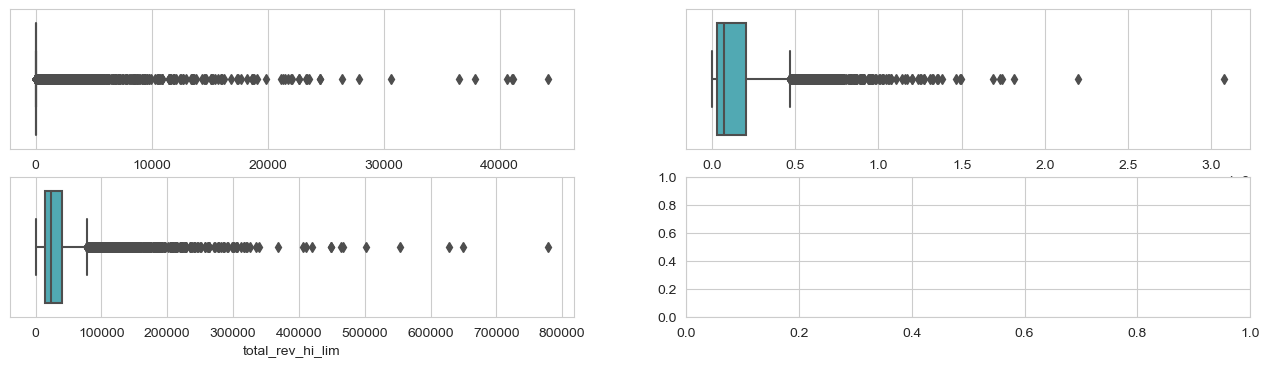

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,4))
sns.boxplot(x=loans_nonull_v2["tot_coll_amt"], palette="YlGnBu", ax = ax[0][0])
sns.boxplot(x=loans_nonull_v2["tot_cur_bal"], palette="YlGnBu", ax = ax[0][1])
sns.boxplot(x=loans_nonull_v2["total_rev_hi_lim"], palette="YlGnBu", ax = ax[1][0])

Бачимо, що тут присутні багато викидів зі значеннями, які є значно вищими, тому правильно буде замінити null значення на медіану по всій ознаці, адже медіана менш чутлива до викидів.

In [18]:
loans_nonull_v2['tot_coll_amt'] = loans_nonull_v2['tot_coll_amt'].fillna(loans_nonull_v2['tot_coll_amt'].median())
loans_nonull_v2['tot_cur_bal'] = loans_nonull_v2['tot_cur_bal'].fillna(loans_nonull_v2['tot_cur_bal'].median())
loans_nonull_v2['total_rev_hi_lim'] = loans_nonull_v2['total_rev_hi_lim'].fillna(loans_nonull_v2['total_rev_hi_lim'].median())

In [19]:
print(f"Percentage of data left: {round(loans_nonull_v2.shape[0] / loans.shape[0] * 100, 2)}%")

Percentage of data left: 99.68%


##### Висновок.
Ми замінили всі пропущені значення за вказаними методами. При цьому втратили менше `0.5%` всіх об'єктів і жодної ознаки. В подальшому зможемо поріввняти результати різних моделей на отриманому датасеті за допомогою заміни і за допомогою видалення null значень

#### 3. Заміна `null` значень з видаленням колонок з багатьма ропусками

Спробуємо також зробити датасет, аналогічний до пункту `2`, але видалити колонку `mths_since_last_delinq`, адже ми не можемо бути на 100% впевненими в нашому припущенні для заміни null значень без повної інформації про збір цих даних.

In [20]:
loans_nonull_v3 = loans.copy()
loans_nonull_v3["emp_length"] = loans_nonull_v3["emp_length"].map(lambda x: x if type(x) == float else 10 if "10+" in x else 0 if "<" in x else x[0]).astype("float64")
loans_nonull_v1["emp_length"] = loans_nonull_v1["emp_length"].map(lambda x: x if type(x) == float else 10 if "10+" in x else 0 if "<" in x else x[0]).astype("float64")
loans_nonull_v3['emp_length'] = loans_nonull_v3['emp_length'].fillna(loans_nonull_v3['emp_length'].mean())
loans_nonull_v3 = loans_nonull_v3.dropna(subset=["dti", "revol_util"], how="any").reset_index(drop=True)
loans_nonull_v3['tot_coll_amt'] = loans_nonull_v3['tot_coll_amt'].fillna(loans_nonull_v3['tot_coll_amt'].median())
loans_nonull_v3['tot_cur_bal'] = loans_nonull_v3['tot_cur_bal'].fillna(loans_nonull_v3['tot_cur_bal'].median())
loans_nonull_v3['total_rev_hi_lim'] = loans_nonull_v3['total_rev_hi_lim'].fillna(loans_nonull_v3['total_rev_hi_lim'].median())
loans_nonull_v3 = loans_nonull_v3.drop(columns=["mths_since_last_delinq"])


In [21]:
print(f"Percentage of data left: {round(loans_nonull_v3.shape[0] / loans.shape[0] * 100, 2)}%")

Percentage of data left: 99.9%


##### Висновок. 
Втратили ще менше об'єктів, але забрали одну ознаку, яку містила майже 50% ропущених значень.

### Висновок до Null Handling.
В результаті цього блоку отримали 3 датасети:
* `loans_nonull_v1`: Видалили ознаку `mths_since_last_delinq` і об'єкти з null значеннями в інших колонках
* `loans_nonull_v2`: Замінили null значення у всіх колонках різними методами
* `loans_nonull_v3`: Видалили ознаку `mths_since_last_delinq` і замінили null значення в інших колонках різними методами

## General Pre-Analysis

Подивимось на розподіл цільової змінної:

<Axes: xlabel='loan_status', ylabel='count'>

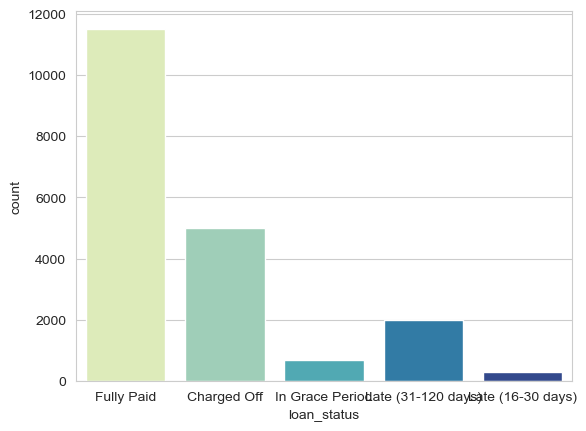

In [22]:
sns.countplot(x='loan_status',data=loans, palette="YlGnBu")

Бачимо, що присутня значна незбалансованість класів. Це може впливати на результати моделей в задачі класифікації, тому потрібно буде з цим боротись.

Подивимось на кореляцію між числовими ознаками:

<Axes: >

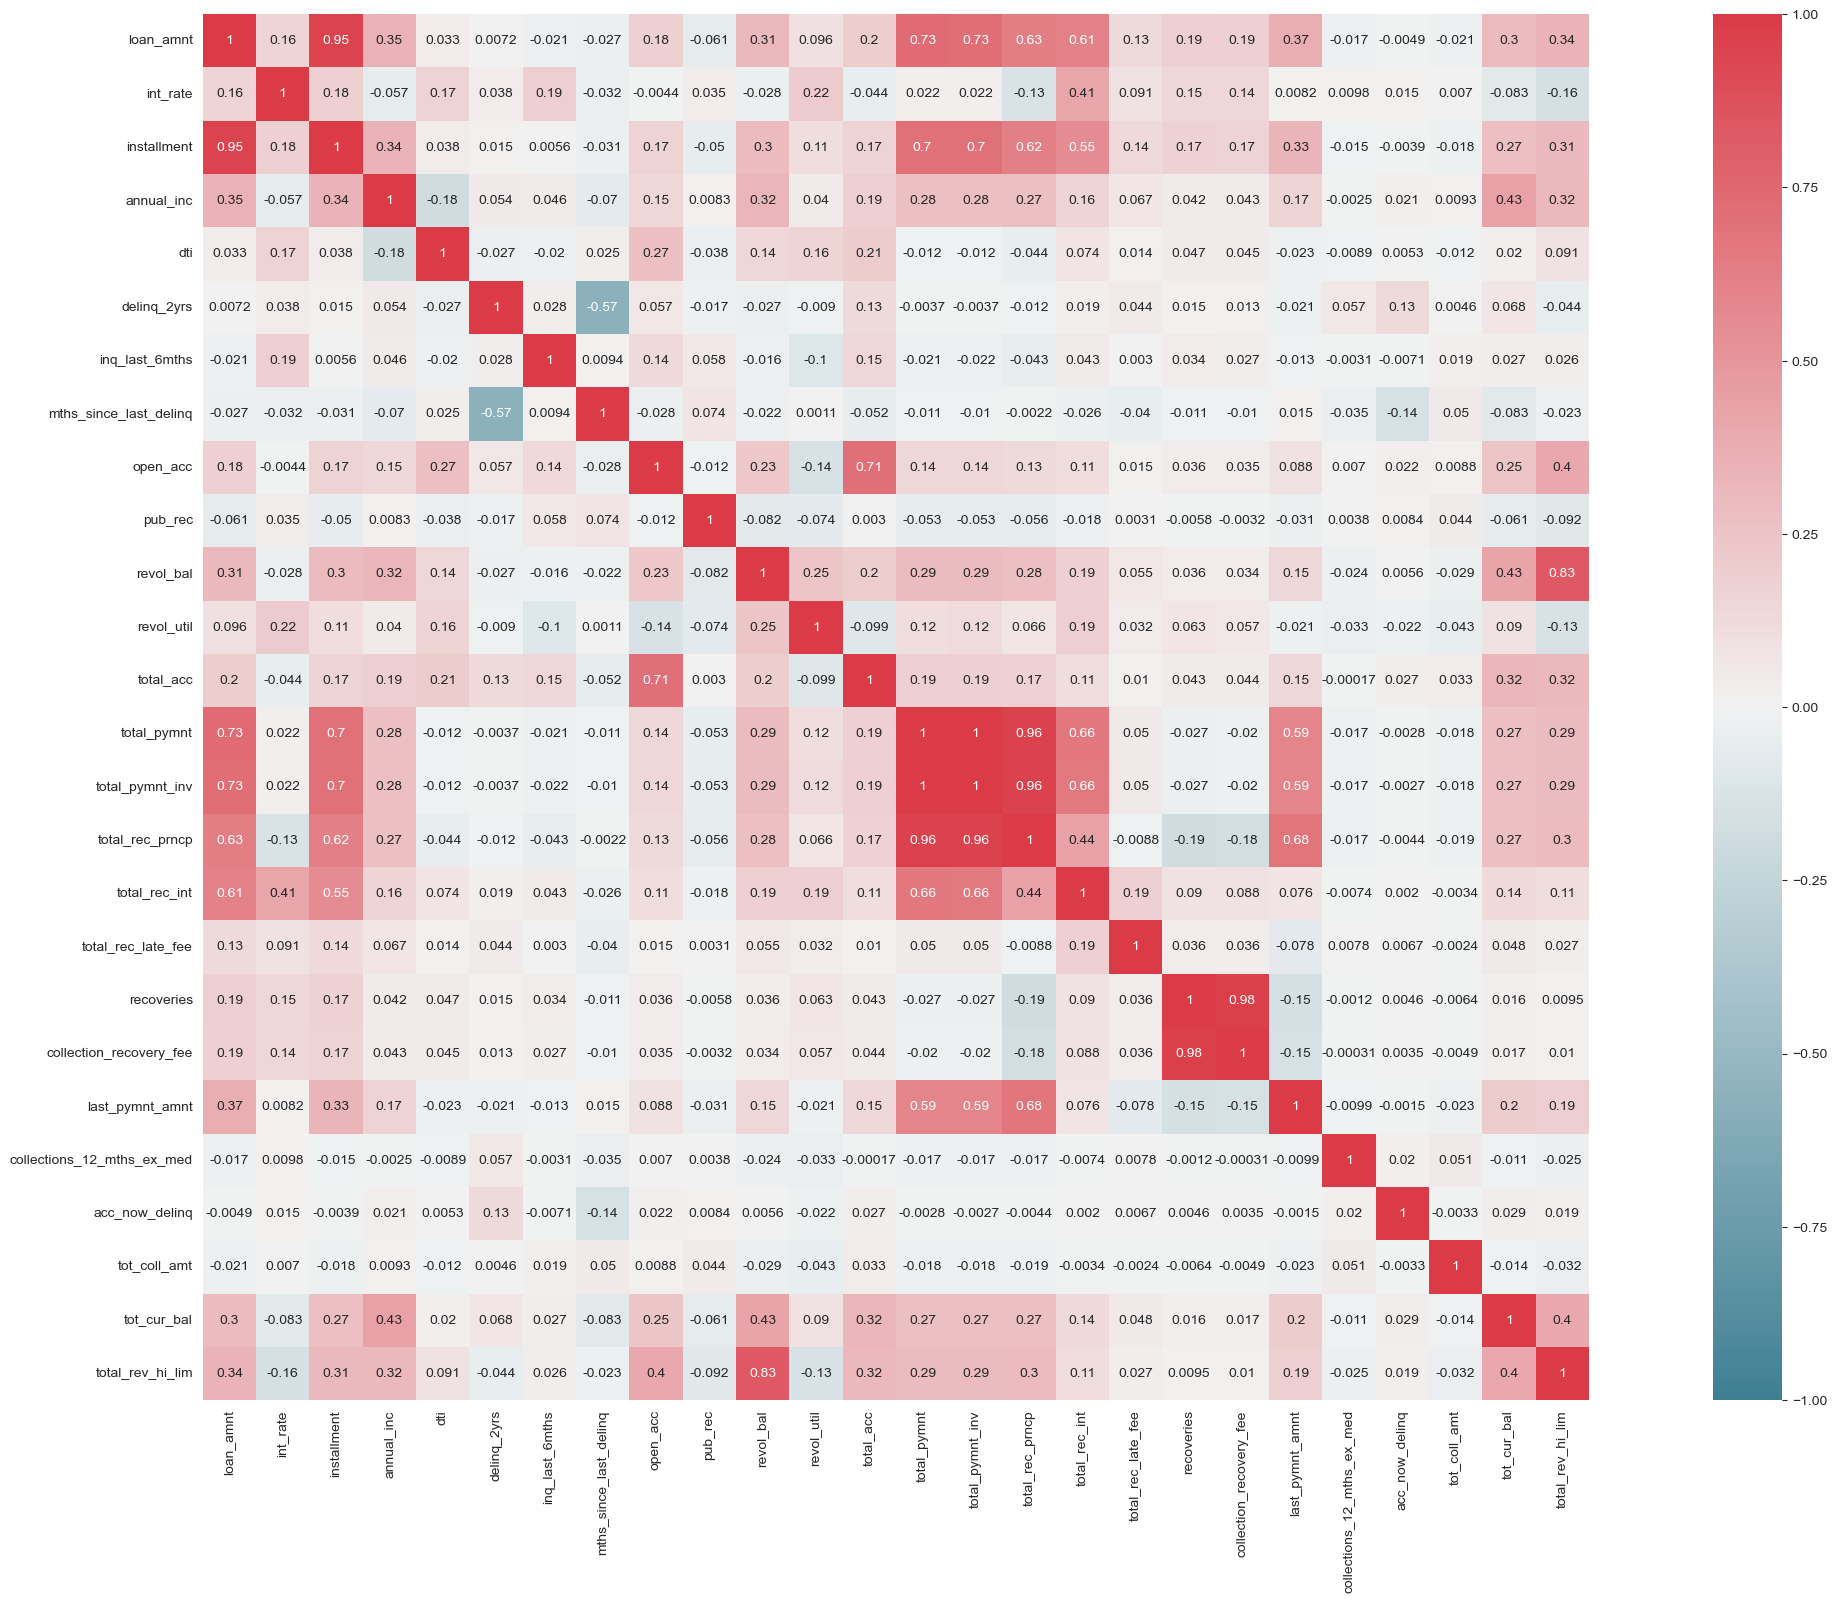

In [23]:
corr = loans.drop(columns=["loan_status"]).corr()
fig, ax = plt.subplots(figsize=(32, 18))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),vmin=-1, vmax=1,ax=ax,cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot=True)


Бачимо, що є декілька ознак, які дуже сильно корелюють між собою (з логічних причин). Це може негативно вплинути на результати наших моделей, тому в майбутньому будемо пробувати видаляти ознаки з кореляцією близькою до 1.

Додатково подивимось на залежність виплати боргу від річного доходу. Розглянемо тільки остаточні `loan_status`, тобто `FullyPaid` або `ChargedOff`.

<Axes: xlabel='binned'>

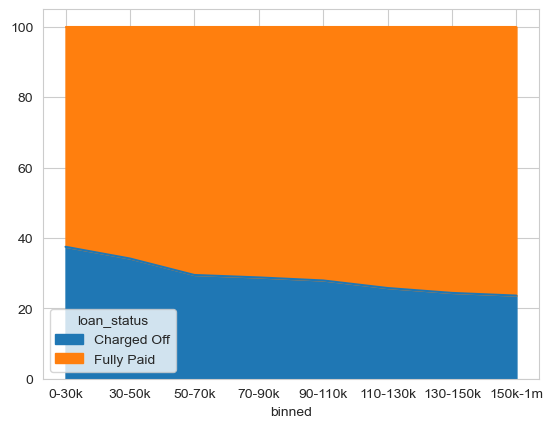

In [24]:
array = ['Charged Off', 'Fully Paid'] 
loans_eda = loans.loc[loans['loan_status'].isin(array)] 
bins = [0,30000, 50000, 70000, 90000, 110000, 130000, 150000, 1000000] 
labels = ['0-30k','30-50k', '50-70k', '70-90k', '90-110k','110-130k','130-150k', '150k-1m'] 
loans_eda['binned'] = pd.cut(loans_eda['annual_inc'], bins=bins, labels=labels) 
analyse_income = loans_eda.groupby(['binned','loan_status'])['loan_status'].count() 
analyse_income = analyse_income.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
analyse_income = analyse_income.unstack() 
analyse_income.plot.area()

Бачимо, що правильною можна вважати гіпотезу, що люди частіше виплачують кредит, якщо в них більший заробіток.

Аналогічно можемо подивитись на залежність від періоду зайнятості:

<Axes: xlabel='emp_length'>

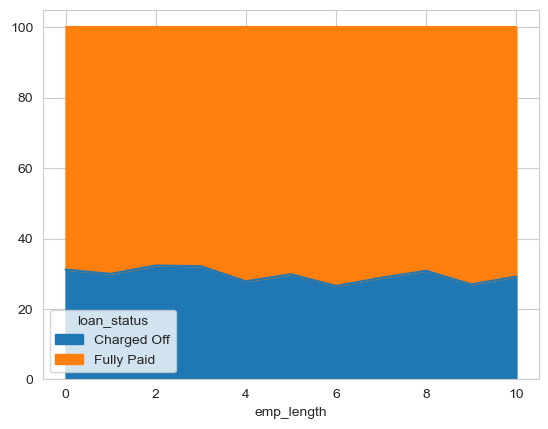

In [25]:
loans_eda["emp_length"] = loans_eda["emp_length"].map(lambda x: x if type(x) == float else 10 if "10+" in x else 0 if "<" in x else x[0]).astype("float64")
analyse_emp_length = loans_eda.groupby(['emp_length','loan_status'])['loan_status'].count() 
analyse_emp_length =analyse_emp_length.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

#visualization 
analyse_emp_length = analyse_emp_length.unstack() 
analyse_emp_length.plot.area()

Бачимо, що тут залежності нема і відсоток виплачених кредитів залишається на приблизно однаковому рівні.

### Висновок до General Pre-Analysis.
Ми подивились на візуалізацію основних залежностей, спільних для всіх завдань (регресії, класифікації). Проаналізували, які проблеми можуть виникнути при подальшому навчанні моделей. Подальший аналіз буде проводитись окремо для кожного завдання.

## Outliers Handling

На графіках нижче можна побачити, що кожна ознака містить певні аномальні значення (що очевидно, враховуючи великий розмір даних). Ці викиди можуть негативно впливати на результати наших моделей.

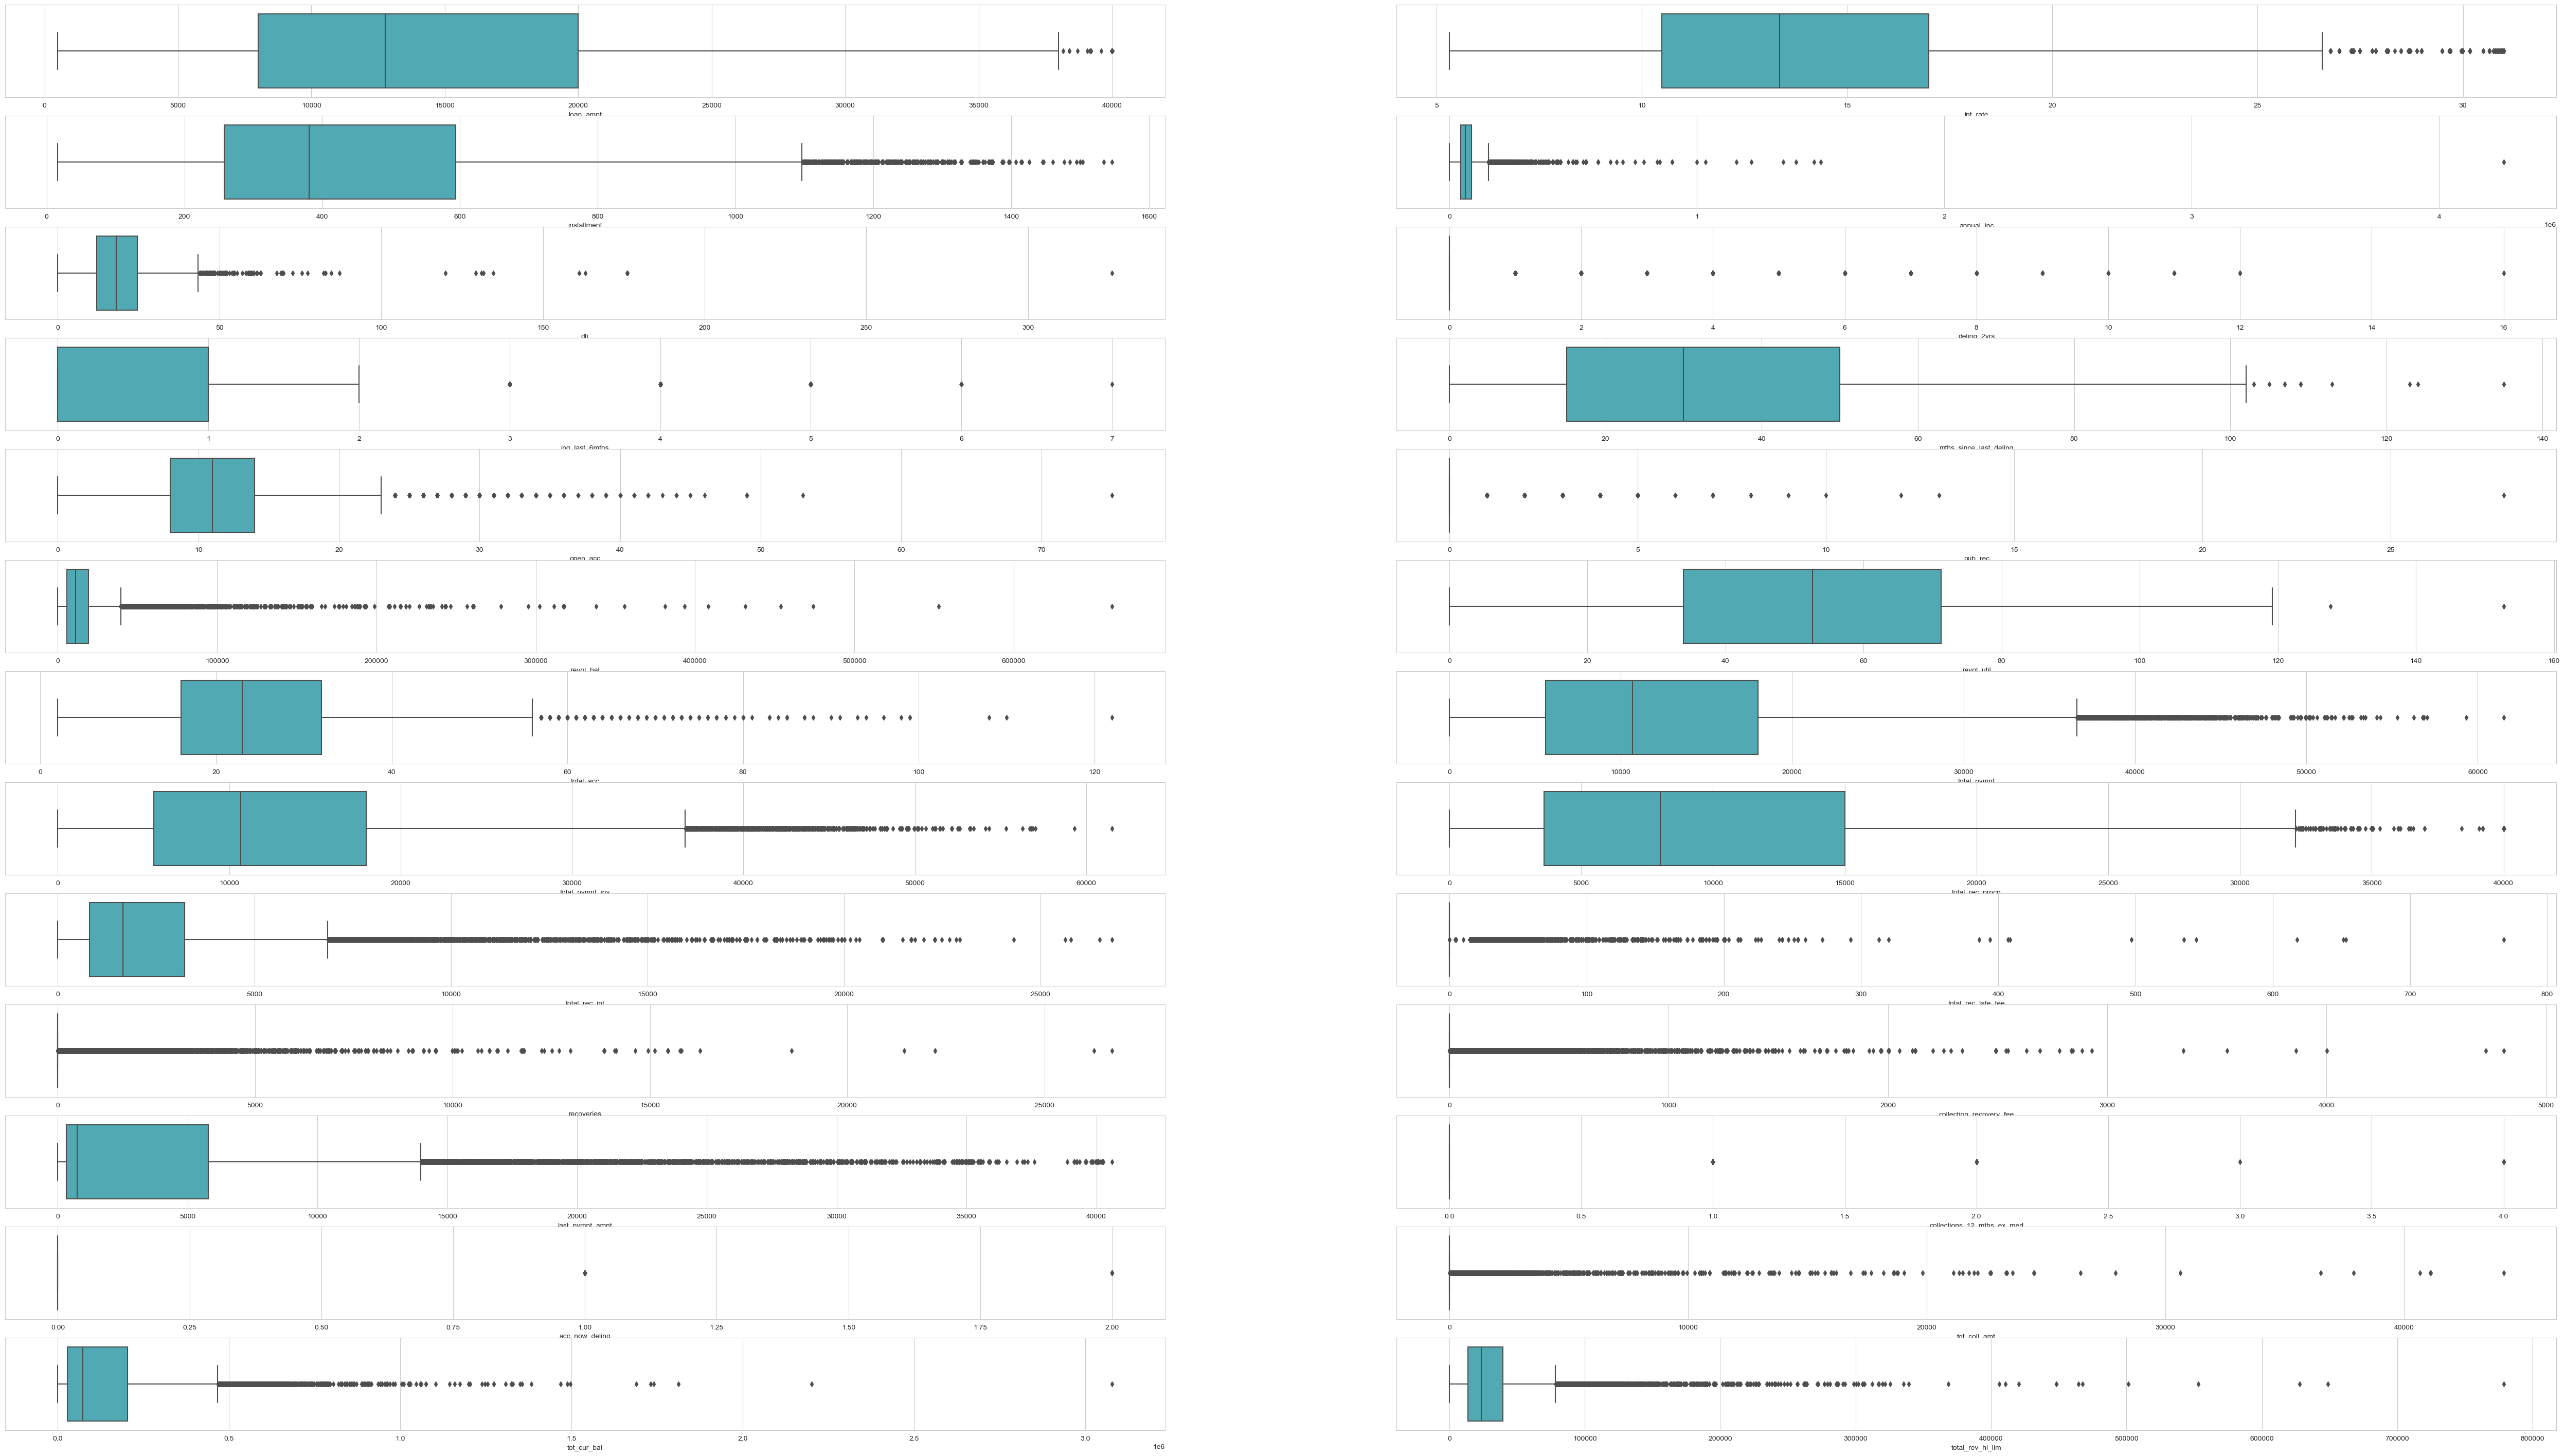

In [26]:
numeric_features = loans.select_dtypes([np.number]).columns
fig, ax = plt.subplots(nrows=round(len(numeric_features) / 2), ncols=2, figsize=(64,36))
i, j = (0,0)
for feature in numeric_features:
    sns.boxplot(x=loans[feature], palette="YlGnBu", ax = ax[i][j])
    i += j
    j = (j+1) % 2

Також подамо у вигляді віджета, щоб можна було детальніше розглянути кожен boxplot:

In [148]:
widgets.interact(lambda x: sns.boxplot(x=x, data=loans, palette="YlGnBu"), x=widgets.Dropdown(options=numeric_features, description="Column:"))

interactive(children=(Dropdown(description='Column:', options=('loan_amnt', 'int_rate', 'installment', 'emp_le…

<function __main__.<lambda>(x)>

Далі спробуємо визначити об'єкти з аномальними значеннями числових ознак і видалити їх. Робити це будемо наступним чином:
* Напишемо функцію, яка в циклі буде проходити по кожній числовій ознаці і визначати викиди
* На кожній ітерації викидом вважатимемо те значення, яке `менше за 1-ий квантиль - крок викиду` або `більше за 3-ій квантиль + крок викиду`
* За крок викиду візьмемо 1,5 * IQR (Interquartile range)
* Для кожної ознаки записуватимемо індекси викидів в список. Після обробки всіх ознак видалятимемо ті рядки, поява яких в списку викидів перевищувала n разів

In [28]:
from collections import Counter
def outliers(df, features, n):
    outliers_ids = []
    for feature in features:
        q1 = np.percentile(df[feature], 25)
        q3 = np.percentile(df[feature], 75)
        step = 1.5*(q3 - q1)
        ids = df[(df[feature] < q1 - step) | (df[feature] > q3 + step)].index
        outliers_ids.extend(ids)
    outliers_ids = Counter(outliers_ids)
    delete = [key for key,value in outliers_ids.items() if value >= n]
    return delete
delete = outliers(loans, numeric_features, 10)
delete

[83, 5984, 13614, 9263, 1793, 8383, 15745]

Бачимо, що є, наприклад, 7 об'єктів, які мають аномальні значення зразу в 10 ознаках з 26. Вони можуть зміщувати результати навчання наших моделей, тому згодом можна спробувати видаляти такі об'єкти.

### Висновок до Outliers Handling.

В цьому блоці ми визначили, які значення вважати аномальними і написали функцію, яка видає об'єкти з кількістю аномальних ознак більшою за певний поріг. Це може знадобитись нам для подальшого навчання моделей.

## 2. **Задача регресії**. 

Створити нову цільову змінну `y_reg` яка приймає значення `1` якщо `loan_status` `==` `Charged Off` і `0` в інших випадках. Після цього вилучити з датасету `loan_status`. (Зверніть увагу: датасет містить неповні дані, тому варто розглянути різні стратегії роботи з пропусками в даних)

   * Навчити модель лінійної регресії, експерементуючи з параметрами регуляризації, кількістю і складом ознак.     Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.
    
   * Навчити модель SVM Regressor (`sklearn.svm.SVR`), експерементуючи з параметрами регуляризації та ядра. Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.

   * Навчити модель KNN Regressor (`sklearn.neighbors.KNeighborsRegressor`), експерементуючи з параметрами кількості сусідів та метрики. Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.
    
   * Навчити модель `sklearn.tree.DecisionTreeRegressor`, експерементуючи з параметрами `criterion`, `max_depth`, `max_features`, `min_samples_split`, `min_samples_leaf`. Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.
    
   * Навчити модель `sklearn.ensemble.RandomForestRegressor`, експерементуючи з параметрами `n_estimators`, `max_depth`, `max_features`. Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.



## Pre-Analysis
Спочатку утворимо цільову змінну у повному датасеті (без null handling), щоб провести більш детальний аналіз

In [29]:
loans_reg = loans.copy()
loans_reg["y_reg"] = loans["loan_status"].map(lambda x: 1 if x == "Charged Off" else 0)
loans_reg = loans_reg.drop(columns=["loan_status"])
loans_reg

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,y_reg
0,24000,10.49,779.95,B,3 years,MORTGAGE,89000.0,21.12,1.0,2.0,31.0,8.0,0.0,28137,64.0,19.0,27437.333790,27437.33,24000.00,3359.33,78.0,0.00,0.000,16901.45,1.0,Individual,0.0,0.0,70116.0,43670.0,0
1,15000,21.49,409.95,D,NaN,RENT,38251.2,30.98,0.0,0.0,NaN,11.0,0.0,5357,24.8,13.0,10687.220000,10687.22,3769.92,5302.70,0.0,1614.60,145.314,409.95,1.0,Individual,0.0,273.0,31306.0,21600.0,1
2,24000,6.97,740.73,A,2 years,MORTGAGE,92000.0,16.57,0.0,2.0,NaN,11.0,0.0,8162,11.8,21.0,26148.750000,26148.75,24000.00,2148.75,0.0,0.00,0.000,12074.88,0.0,Individual,0.0,0.0,196318.0,68900.0,0
3,6500,19.22,238.99,D,4 years,MORTGAGE,25000.0,9.70,0.0,0.0,NaN,5.0,0.0,6848,41.0,7.0,7565.000000,7565.00,5313.58,2109.37,15.0,127.05,22.869,238.99,0.0,Individual,0.0,0.0,6848.0,16700.0,1
4,20000,11.22,656.86,B,10+ years,OWN,58000.0,16.59,0.0,1.0,36.0,13.0,0.0,11831,45.3,18.0,20088.830000,20088.83,20000.00,88.83,0.0,0.00,0.000,20101.30,0.0,Individual,0.0,0.0,426287.0,26100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19495,26000,14.08,606.06,C,10+ years,MORTGAGE,80000.0,8.62,0.0,0.0,NaN,9.0,0.0,12978,63.0,30.0,26223.713330,26223.71,26000.00,223.71,0.0,0.00,0.000,26244.05,0.0,Individual,0.0,4812.0,110260.0,20600.0,0
19496,3000,12.74,100.71,C,10+ years,MORTGAGE,109000.0,34.29,1.0,0.0,6.0,14.0,0.0,34587,74.2,42.0,3077.051662,3077.05,3000.00,77.05,0.0,0.00,0.000,2978.46,0.0,Individual,0.0,0.0,260585.0,46600.0,0
19497,17000,11.12,557.53,B,7 years,MORTGAGE,75000.0,20.77,0.0,1.0,37.0,8.0,0.0,69905,28.3,15.0,20020.680680,19961.80,17000.01,3020.67,0.0,0.00,0.000,2785.60,0.0,Individual,0.0,NaN,NaN,NaN,0
19498,30000,8.18,942.59,B,7 years,RENT,175000.0,7.19,2.0,0.0,5.0,5.0,0.0,24516,51.1,12.0,33909.765320,33909.77,30000.00,3909.77,0.0,0.00,0.000,3.80,0.0,Individual,0.0,0.0,88348.0,48000.0,0


Подивимось на коефіцієнт кореляції Пірсона між числовими змінними і цільовою змінною:

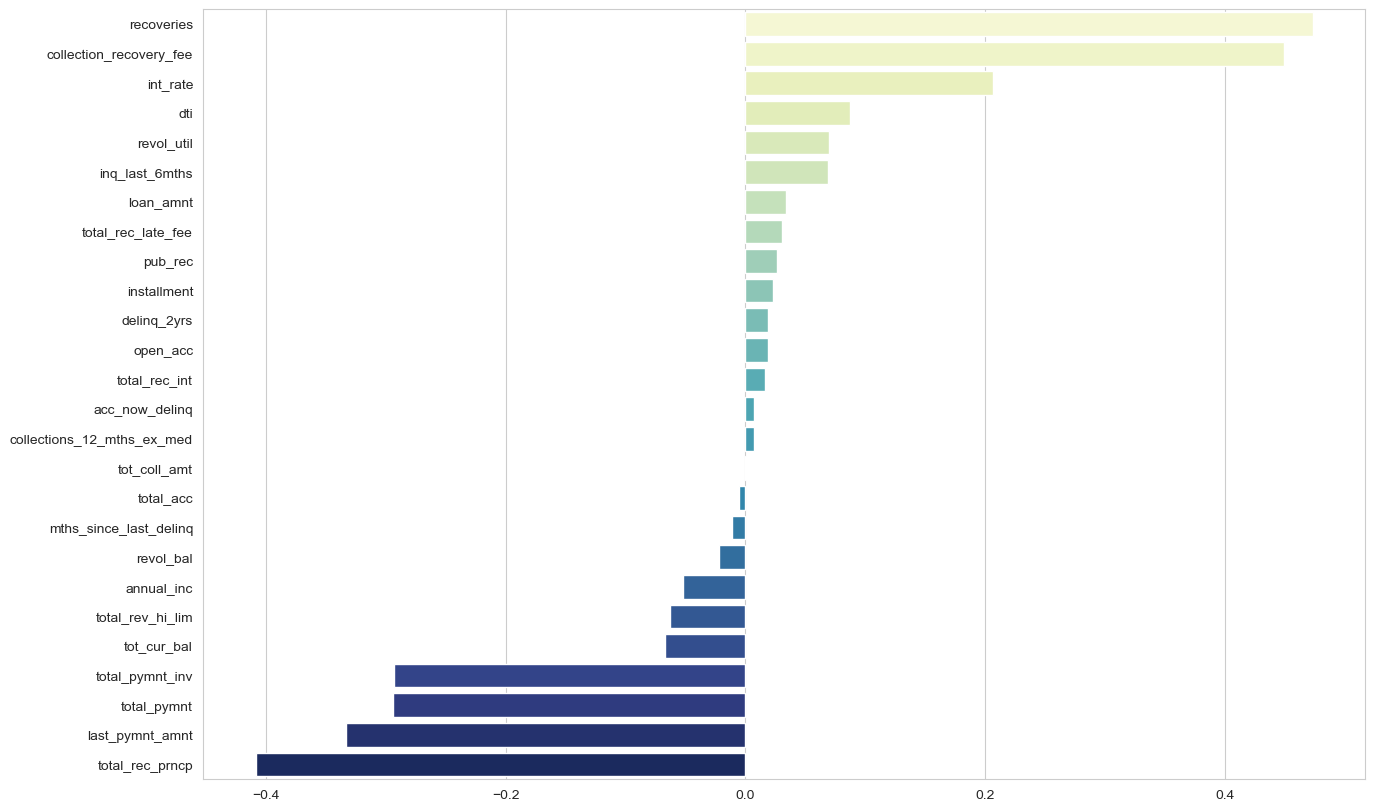

In [30]:
correlations = loans_reg.drop(columns=["y_reg"])[numeric_features].corrwith(loans_reg["y_reg"]).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations, palette="YlGnBu")
plot.figure.set_size_inches(15, 10)

Бачимо, що жодна ознака не показує надто високої лінійної пов'язаності з цільовою змінною. Причино цього частково є те, що наша задача регресії більш подібна до задачі класифікації (має тільки 2 дискретні значення), тому важко знайти таку пряму, що б описувала ці значення дуже правдоподібно. Це можна зрозуміти з графіку:

<Axes: xlabel='recoveries', ylabel='y_reg'>

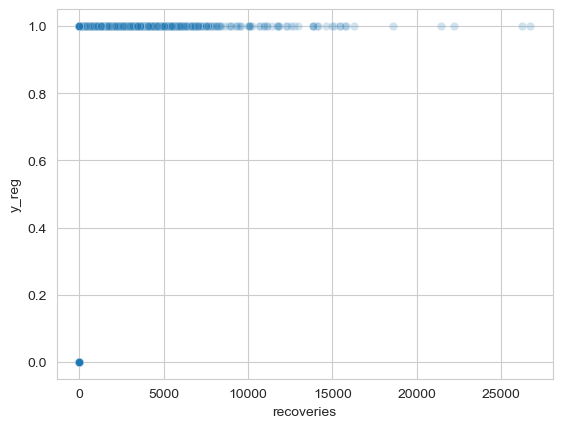

In [31]:
sns.scatterplot(x=loans_reg.drop(columns=["y_reg"])["recoveries"], y=loans_reg["y_reg"], alpha = 0.2, palette="YlGnBu")

Що цікаво, по графіку видно, що якщо `recoveries` > 0, то кредит обов'язково не буде сплачено. Якщо подивитись на опис цієї ознаки, то це логічно, адже `recoveries` показує `post charged-off` виплату, тобто вона передбачає не сплачення кредиту.

<Axes: xlabel='y_reg', ylabel='count'>

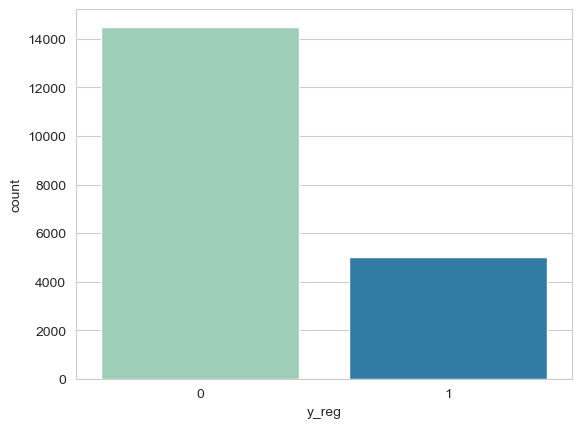

In [32]:
sns.countplot(x='y_reg',data=loans_reg, palette="YlGnBu")

In [33]:
loans_reg["y_reg"].value_counts().map(lambda x: f"{round(x / 19500 * 100, 2)}%")

0    74.36%
1    25.64%
Name: y_reg, dtype: object

Як і було сказано раніше, бачимо великий дизбаланс в значення цільової змінної. Хоча ми і розв'язуємо задачу регресії, але мала наявність в навчальній чи тестовій вибірках об'єктів зі значенням цільової змінної 1 може негативно вплинути на резульат. Тому спробуємо використовувати `Stratified` функції(параметри), тобто ті, що зберігають відсоткове співвідношення між класами у вибірках. 

## Regression

Спочатку утворимо цільову змімнну у наших датасетах з null handling.

In [34]:
X_nn_all = []
def get_original():
    global loans_nonull_v1, loans_nonull_v2, loans_nonull_v3,  X_nn_all
    loans_nonull_v1_reg = loans_nonull_v1.copy()
    loans_nonull_v2_reg = loans_nonull_v2.copy()
    loans_nonull_v3_reg = loans_nonull_v3.copy()
    X_nn_all = []
    for loan in (loans_nonull_v1_reg, loans_nonull_v2_reg, loans_nonull_v3_reg):
        loan["y_reg"] = loan["loan_status"].map(lambda x: 1 if x == "Charged Off" else 0)
        loan = loan.drop(columns=["loan_status"])
        X_nn_all.append((loan["y_reg"], loan.drop(columns=["y_reg"])))
    #((y_v1, X_v1), (y_v2, X_v2), (y_v3, X_v3)) = X_nn_all
get_original()

Оскільки матимемо багато моделей і різні варіанти роботи з пропущеними даними, то напишемо функцію, яка буде приймати параметри нашого навчання і видавати результат:

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def output(pipeline=None, null_handle_v=3, stratify=False, best_alpha=False, best_sgd=False, title=False, best_svm=False, best_knn=False, best_tree=False):
    global X_nn_all
    not_alpha = [sklearn.linear_model._base.LinearRegression, sklearn.linear_model._stochastic_gradient.SGDRegressor]
    y, X = X_nn_all[null_handle_v - 1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, stratify = y if stratify else None)
    if best_alpha and type(pipeline[1]) not in not_alpha:
        alphas = np.logspace(-4, 2, 25)
        searcher = GridSearchCV(pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1)
        searcher.fit(X_train, y_train)

        best_alpha = searcher.best_params_["regression__alpha"]
        pipeline[1].set_params(alpha=best_alpha)
    if best_sgd and type(pipeline[1]) == not_alpha[1]:
        param_grid = {
        'regression__alpha': np.logspace(-3, 2, 10),
        'regression__penalty': ['l2', 'l1', 'elasticnet'],
        'regression__learning_rate': ['constant', 'optimal', 'invscaling'],
        }
        searcher = GridSearchCV(pipeline, [param_grid],
                        scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1)
        searcher.fit(X_train, y_train)
        best = {name[name.find("__") + 2:]: val for name, val in searcher.best_params_.items()}
        pipeline[1].set_params(**best)
    if best_svm:
        C = np.logspace(-3, 2, 40)
        searcher = RandomizedSearchCV(pipeline, [{"regression__C": C}],
                        scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1, random_state=4)
        searcher.fit(X_train, y_train)
        best_C = searcher.best_params_["regression__C"]
        pipeline[1].set_params(C=best_C)
    if best_knn:
        param_grid = {
            'regression__n_neighbors' : range(4, 20),
            'regression__weights' : ['uniform','distance'],
            'regression__p' : [1,2]
        }
        searcher = GridSearchCV(pipeline, [param_grid],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
        searcher.fit(X_train, y_train)
        best = {name[name.find("__") + 2:]: val for name, val in searcher.best_params_.items()}
        pipeline[1].set_params(**best)
    if best_tree:
        param_grid = {
            "regression__criterion": ["squared_error", "absolute_error", "poisson"],
            "regression__max_depth" : [None,5,7,9,11,12],
            "regression__min_samples_leaf":[10, 20, 30, 50, 70, 100, 150],
            #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
            "regression__max_features":["auto", 9 ,"sqrt"],
            #"max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90],
        }
        if type(pipeline[1]) == sklearn.ensemble._forest.RandomForestRegressor:
            param_grid["regression__n_estimators"] = [50, 100, 150, 200]
            param_grid["regression__min_samples_leaf"] = [1, 2, 5, 10]
        searcher = RandomizedSearchCV(pipeline, [param_grid],
                        scoring="neg_root_mean_squared_error", cv=3, n_jobs=-1, random_state=4, n_iter=5)
        searcher.fit(X_train, y_train)
        best = {name[name.find("__") + 2:]: val for name, val in searcher.best_params_.items()}
        pipeline[1].set_params(**best)
        
        
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_pred = pipeline.predict(X_test)
    if title:
        print("-"*10 + f"{pipeline[1]}" + "-"*10)
    print(f"---Null Handling v{null_handle_v}---")
    print(f"Test R2: {round(r2_score(y_test, y_pred), 4)}")
    print(f"Train R2: {round(r2_score(y_train, y_train_pred), 4)}")
    


### Feature Selection
Для детального підбору найбільш необхідних для навчання ознак потрібно добре розбиратися в сфері самого датасету, а також мати повну інформацію про походження даних і їх збір.

Тому в цьому розділі спробуємо задіяти 2 найбанальніші техніки підбору ознак, з якими отім поексперементуємо при навчанні моделей

#### 1. Прибиремо ознаки, які мають високу кореляцію одна з одною

In [36]:
numeric_features = loans_nonull_v2.select_dtypes([np.number]).columns
low_corr = numeric_features.drop(['total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','installment', 'total_pymnt', "total_rev_hi_lim","collection_recovery_fee", "total_acc"])

#### 2. Спробуємо скористатись `SequentialFeatureSelector` для підбору важливих ознак

In [37]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
sfs = SequentialFeatureSelector(LinearRegression(), n_jobs = -1)
y, X = X_nn_all[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
scaler=StandardScaler()
scaled = scaler.fit_transform(X_train[numeric_features])
sfs.fit(scaled, y_train)
lin_selected = numeric_features[sfs.get_support()]

### Linear models

Спробуємо навчити різні лінійні моделі регресії. Спочатку подивимось на результати на числових ознаках зі скейлингом (він тут однозначно потрібний, адже шкали всіх ознак дуже різні):

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 

numeric_features = loans_nonull_v2.select_dtypes([np.number]).columns
models = [LinearRegression(), Ridge(), Lasso(), SGDRegressor(random_state=4)]

column_transformer = ColumnTransformer([
    ("scaler", StandardScaler(), numeric_features),
])

for model in models:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])
    output(pipeline, 1, title=True)
    output(pipeline, 2)
    output(pipeline, 3)

----------LinearRegression()----------
---Null Handling v1---
Test R2: 0.4015
Train R2: 0.4074
---Null Handling v2---
Test R2: 0.3821
Train R2: 0.3973
---Null Handling v3---
Test R2: 0.3835
Train R2: 0.3981
----------Ridge()----------
---Null Handling v1---
Test R2: 0.4016
Train R2: 0.4073
---Null Handling v2---
Test R2: 0.3823
Train R2: 0.3973
---Null Handling v3---
Test R2: 0.3835
Train R2: 0.3981
----------Lasso()----------
---Null Handling v1---
Test R2: -0.0002
Train R2: 0.0
---Null Handling v2---
Test R2: -0.0
Train R2: 0.0
---Null Handling v3---
Test R2: -0.0
Train R2: 0.0
----------SGDRegressor(random_state=4)----------
---Null Handling v1---
Test R2: 0.3985
Train R2: 0.404
---Null Handling v2---
Test R2: 0.3797
Train R2: 0.3919
---Null Handling v3---
Test R2: 0.3743
Train R2: 0.3945


Бачимо, що результати всіх моделей, окрім lasso, приблизно однакові. Причому у всіх моделях `null handling v1` дає найкращий результат. `Lasso` дає 0 результат (фактично це значить, що дає передбачення, як скалярна модель) без підбору найкращого коефіцієнту регуляризації. Тому спробуємо підібрати найкращі параметри для наших моделей:

In [39]:
for model in models:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])
    output(pipeline, 1, title=True, best_alpha=True, best_sgd=True)
    output(pipeline, 2, best_alpha=True)
    output(pipeline, 3, best_alpha=True)

----------LinearRegression()----------
---Null Handling v1---
Test R2: 0.4015
Train R2: 0.4074
---Null Handling v2---
Test R2: 0.3821
Train R2: 0.3973
---Null Handling v3---
Test R2: 0.3835
Train R2: 0.3981
----------Ridge(alpha=0.31622776601683794)----------
---Null Handling v1---
Test R2: 0.4016
Train R2: 0.4074
---Null Handling v2---
Test R2: 0.3825
Train R2: 0.3973
---Null Handling v3---
Test R2: 0.3836
Train R2: 0.3979
----------Lasso(alpha=0.0001)----------
---Null Handling v1---
Test R2: 0.4016
Train R2: 0.4073
---Null Handling v2---
Test R2: 0.3828
Train R2: 0.3973
---Null Handling v3---
Test R2: 0.3835
Train R2: 0.398
----------SGDRegressor(alpha=0.001, penalty='l1', random_state=4)----------
---Null Handling v1---
Test R2: 0.3986
Train R2: 0.4026
---Null Handling v2---
Test R2: 0.3821
Train R2: 0.391
---Null Handling v3---
Test R2: 0.3765
Train R2: 0.3951


Результати всіх моделей незначно покращились, а `Lasso` почала давати результат на рівні з іншими моделями.
Тепер додамо бінаризацію до кроків навчання

In [40]:
from sklearn.preprocessing import KBinsDiscretizer
column_transformer = ColumnTransformer([
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features)
])

for model in models:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])
    output(pipeline, 1, title=True)
    output(pipeline, 2)
    output(pipeline, 3, best_alpha=True)

----------LinearRegression()----------
---Null Handling v1---
Test R2: 0.6719
Train R2: 0.686
---Null Handling v2---
Test R2: 0.6725
Train R2: 0.6806
---Null Handling v3---
Test R2: 0.6873
Train R2: 0.6782
----------Ridge(alpha=56.23413251903491)----------
---Null Handling v1---
Test R2: 0.6719
Train R2: 0.6857
---Null Handling v2---
Test R2: 0.6725
Train R2: 0.6803
---Null Handling v3---
Test R2: 0.6873
Train R2: 0.6781
----------Lasso(alpha=0.00031622776601683794)----------
---Null Handling v1---
Test R2: 0.672
Train R2: 0.685
---Null Handling v2---
Test R2: 0.6726
Train R2: 0.6797
---Null Handling v3---
Test R2: 0.6877
Train R2: 0.6778
----------SGDRegressor(alpha=0.001, penalty='l1', random_state=4)----------
---Null Handling v1---
Test R2: 0.6705
Train R2: 0.6805
---Null Handling v2---
Test R2: 0.6668
Train R2: 0.6738
---Null Handling v3---
Test R2: 0.6839
Train R2: 0.6725


Бінаризація значно покращила результат. Також бачимо, що тепер `Null Handling v3` дає найкращі результати. Враховуючи, що це варіант є чимось середнім між v1 i v2 і добре підійде для роботи з зовнішньою вибіркою, то надалі будемо в основному користуватися ним. Спробуємо використати `PolynomialFeatures`. Бінаризація повинна допомогти зменшити ризик перенавчання. 

In [41]:
from sklearn.preprocessing import PolynomialFeatures
column_transformer = ColumnTransformer([
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
    ('polynoms', PolynomialFeatures(degree=2, include_bias=False), numeric_features)
])

for model in models[:3]:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])
    output(pipeline, 3, title=True)

----------LinearRegression()----------
---Null Handling v3---
Test R2: 0.6722
Train R2: 0.7033
----------Ridge(alpha=17.78279410038923)----------
---Null Handling v3---
Test R2: 0.6725
Train R2: 0.7031
----------Lasso(alpha=0.00017782794100389227)----------
---Null Handling v3---
Test R2: 0.6931
Train R2: 0.7014


Результат `Lasso` незначно покращився, а інші моделі незначно погіршились. Спробуємо залучити всі ознаки, додавши `One-Hot` кодування для категорійних.

In [42]:
from sklearn.preprocessing import OneHotEncoder
categorical1 = X_nn_all[0][1].dtypes[X_nn_all[0][1].dtypes == "object"].index
categorical2 = X_nn_all[1][1].dtypes[X_nn_all[1][1].dtypes == "object"].index
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
    ('polynoms', PolynomialFeatures(degree=2, include_bias=False), numeric_features)
])

for model in models[:3]:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])
    output(pipeline, 3, best_alpha=True, title=True)

----------LinearRegression()----------
---Null Handling v3---
Test R2: 0.6942
Train R2: 0.7077
----------Ridge(alpha=56.23413251903491)----------
---Null Handling v3---
Test R2: 0.6886
Train R2: 0.7064
----------Lasso(alpha=0.0001)----------
---Null Handling v3---
Test R2: 0.698
Train R2: 0.7063


Також спробуємо користуватись підібраними ознаками `low_corr`, `lin_selected`:

In [43]:
#low_corr = numeric_features.drop(['total_pymnt_inv', 'total_rec_prncp'])
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical1),
    ("scaler", StandardScaler(), lin_selected),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), lin_selected),
    ('polynoms', PolynomialFeatures(degree=2, include_bias=False), lin_selected)
])

for model in models[:3]:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])
    output(pipeline, 3, title=True)

----------LinearRegression()----------
---Null Handling v3---
Test R2: 0.7025
Train R2: 0.6961
----------Ridge(alpha=56.23413251903491)----------
---Null Handling v3---
Test R2: 0.7016
Train R2: 0.6952
----------Lasso(alpha=0.0001)----------
---Null Handling v3---
Test R2: 0.7021
Train R2: 0.6957


`low_corr` погіршив результати.Використання `lin_selected` майже не вплинуло на результат, але в основному незначно покращило його. Далі спробуємо видалити об'єкти, які мають аномальні значення в більше, ніж 9 колонках.

In [44]:
delete = outliers(X_nn_all[2][1], numeric_features, 9)
X_nn_all[2][1].drop(delete, inplace=True)
X_nn_all[2][0].drop(delete, inplace=True)


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
    ('polynoms', PolynomialFeatures(degree=2, include_bias=False), numeric_features)
])

for model in models[:3]:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])
    output(pipeline, 3, title=True, stratify=True)
get_original()

----------LinearRegression()----------
---Null Handling v3---
Test R2: 0.6791
Train R2: 0.7081
----------Ridge(alpha=56.23413251903491)----------
---Null Handling v3---
Test R2: 0.6838
Train R2: 0.707
----------Lasso(alpha=0.0001)----------
---Null Handling v3---
Test R2: 0.6895
Train R2: 0.7069


Це негативно вплинуло на результат наших моделей

### Висновок до Linear Models
Ми спробували навчити лінійні моделі регресії, експерементуючи з кроками навчання, підбором параметрів, кількістю ознак і об'єктів. Найкращим ходом було додати бінаризацію, що значно збільшило результати. В основному всі моделі давали приблизно однакові результати, але найкращою виявилась `Lasso` зі скейлингом, бінаризацією, One-Hot кодуванням, PolynomailFeatures і підібраними найкращими параметрами (`R2` на відкладеній вибірці: `0.7021`)

### SVM Regressor


Модель регресії :  $a(x) = \langle w,x \rangle + b$, $w\in\mathbb{R}^n,$ $b\in\mathbb{R}$
	
Функція втрат : $\mathcal{L} (\varepsilon) = (|\varepsilon| - \delta)_+$ (раніше $\mathcal{L} (\varepsilon) = \varepsilon^2)$
	
$$\sum\limits_{i=1}^{\ell} (|\langle w,x_i \rangle +b - y_i|-\delta)_+ + \frac{1}{2C} \|w\|^2 \longrightarrow \min\limits_{w,b}$$
	
Задача розв'язується шляхом заміни змінних і зведенням до задачі квадратичної оптимізації

Заміна змінних 
	$$\xi_i^+ = (\langle w, x_i\rangle +b - y_i - \delta)_+$$
	$$\xi_i^- = (-\langle w, x_i\rangle -b + y_i - \delta)_+$$
	
Оптимізаційна задача
	
$$\begin{cases}
	\frac12\|w\|^2 + C \sum\limits_{i=1}^{\ell} (\xi_i^+ +\xi_i^-) \longrightarrow \min\limits_{w,b,\xi^+, \xi^-} \\
	y_i - \delta - \xi_i^- \leqslant \langle w,x_i \rangle+b \leqslant y_i + \delta +\xi_i^+ , \quad i=1,2,...,\ell\\
	\xi_i^+ \geqslant 0, \quad \xi_i^- \geqslant 0, \quad i=1,2,...,\ell
	\end{cases}$$
	
Це задача квадратичної оптимізації з лінійними обмеженнями-нерівностями

Спробуємо навчити модель SVM Regressor без жодних додаткових кроків. Тип ядра `rbf`: 

In [45]:
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

svr = SVR()
column_transformer = ColumnTransformer([
    ("passthrough", "passthrough", numeric_features)
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', svr)
])
output(pipeline, 3, title=True)

----------SVR()----------
---Null Handling v3---
Test R2: 0.344
Train R2: 0.3675


Бачимо, що результат покищо гірший за результати лінійних моделей. Спробуємо додати скейлинг і підібрати найкращий праметр регуляризації

In [46]:
column_transformer = ColumnTransformer([
    ("scaler", StandardScaler(), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', svr)
])
output(pipeline, 3, title=True, best_svm = True)

----------SVR(C=2.154434690031882)----------
---Null Handling v3---
Test R2: 0.6216
Train R2: 0.714


Бачимо, що результат значно покращився.

Далі спробуємо поексперементувати з стандартними кроками навчання (`One-Hot`, `binning`, `PolynomialFeatures`). Подивимось на найкращий результат:

In [47]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', svr)
])
output(pipeline, 3, title=True)

----------SVR(C=2.154434690031882)----------
---Null Handling v3---
Test R2: 0.6717
Train R2: 0.8846


Найвищий коефіцієнт детермінації на тестовій вибірці був для вказаних кроків навчання (без PolynomialFeatures). По результатах видно, що присутнє певне перенавчання

Спробуємо поексперементувати з типом ядра для нашої моделі:

In [48]:
column_transformer = ColumnTransformer([
    ("scaler", StandardScaler(), numeric_features),
])
# Linear
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', svr.set_params(kernel="linear"))
])
output(pipeline, 3, title=True)
#Poly
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', svr.set_params(kernel="poly"))
])
output(pipeline, 3, title=True)
svr.set_params(kernel="rbf")

----------SVR(C=2.154434690031882, kernel='linear')----------
---Null Handling v3---
Test R2: 0.0898
Train R2: 0.183
----------SVR(C=2.154434690031882, kernel='poly')----------
---Null Handling v3---
Test R2: -0.4857
Train R2: 0.4065


SVR(C=2.154434690031882)

Бачимо, що типи ядра `linear` i `poly` значно погіршили результати, тому продовжимо використовувати `rbf`. На останок підберемо найкращий коефіцієнт регуляризації для наших попередніх кроків навчання

In [49]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', svr)
])
output(pipeline, 3, title=True, best_svm=True)

----------SVR(C=2.154434690031882)----------
---Null Handling v3---
Test R2: 0.6717
Train R2: 0.8846


Як бачимо результат незначно погіршився. Це може бути пов'язане з пошуком параметрів за допомогою `RandomizedSearchCV`. Також збільшилось перенавчання, оскільки підібрався параметр регуляризації, який зменшує її силу.

Знову спробуємо викидати ознаки з дуже високою кореляцією і навчати лише по підібраних ознаках

In [50]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical1),
    ("scaler", StandardScaler(), lin_selected),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), lin_selected),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', svr)
])
output(pipeline, 3, title=True)

----------SVR(C=2.154434690031882)----------
---Null Handling v3---
Test R2: 0.674
Train R2: 0.8501


Можливо це і незначно покращило результати, але може допомогти з швидкістю підбору параметрів і перенавчанням при утворенні ознак з PolynomialFeatures.

Також спробували `null handling v2`

In [51]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical2),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', svr)
])
output(pipeline, 2,title=True)

----------SVR(C=2.154434690031882)----------
---Null Handling v2---
Test R2: 0.6521
Train R2: 0.8903


Результат подібний, але все ж гірша ситуація з перенавчанням

### Висновок для SVM Regressor 
Метод опорних векторів показав подібні до лінійних моделей результати. В загальному, найкращим ядком було стандартне `rbf`, а найкращі результати показало при `One-Hot` кодуванні, скейлингу і бінаризації. Найкращий результат на відкладеній вибірці `0.68`, що незначно менше ніж для лінійних моделей, але отримується стабільніше.

### KNN Regressor
Для задачі регресії `KNeighborsRegressor` працює таким чином, що бере середнє арифметичне значення цільової змінної від k найближчих сусідів (або сусідів в радіусі, коли використовуватимемо `RadiusNeighborsRegressor`)

Спробуємо KNN для 1 сусіда з стандартною Евклідовою відстанню і без додаткових кроків навчання: 

In [133]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
column_transformer = ColumnTransformer([
    ("passthrough", "passthrough", numeric_features)
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', knn)
])
output(pipeline, 3, title=True)

----------KNeighborsRegressor(n_neighbors=1)----------
---Null Handling v3---
Test R2: -0.2429
Train R2: 1.0


Як бачимо, 1 сусід не дає бажаного результату. Спробуємо використати стандартні k=5 і додамо скейлинг:

In [134]:
column_transformer = ColumnTransformer([
    ("scaler", StandardScaler(), numeric_features)
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', knn.set_params(n_neighbors=5))
])
output(pipeline, 3, title=True)

----------KNeighborsRegressor()----------
---Null Handling v3---
Test R2: 0.4389
Train R2: 0.629


Як бачимо, результат зразу значно покращився. Але все ще присутнє перенавчання (на пряму залежить від кількості сусідів). Можемо спробувати додати бінаризацію і підібрати найкращу кількість сусідів методом крос-валідації 

In [54]:
column_transformer = ColumnTransformer([
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features)
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', knn)
])
output(pipeline, 3, title=True, best_knn=True)

----------KNeighborsRegressor(n_neighbors=19, p=1, weights='distance')----------
---Null Handling v3---
Test R2: 0.5967
Train R2: 1.0


Отже, отримали кращий результат але з відчутним перенавчанням (хоча кількість сусідів 19, але їх вплив оцінюється відповідно до відстані). Також підібрався тип пошуку відстані `manhattan_distance`. Додамо `One-Hot` кодування, збільшимо сітку параметрів і подивимось на новий результат

In [55]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', knn)
])
output(pipeline, 3, title=True, best_knn=True)

----------KNeighborsRegressor(n_neighbors=17, p=1, weights='distance')----------
---Null Handling v3---
Test R2: 0.5882
Train R2: 1.0


В даному випадку `One-Hot` незначно погіршив результат. Найкращою метрикою все ще залишилась `manhattan_distance`, а ваги сусідів беруться пропорційно до відстані. Бачимо, що присутнє значне перенавчання, яке не зменшується при зміні кількості сусідів (частково пов'язано з типом `weights`). Спробуємо вирізати деякі ознаки, це може допомогти.

In [56]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical1),
    ("scaler", StandardScaler(), lin_selected),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), lin_selected),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', knn)
])
output(pipeline, 3, title=True)

----------KNeighborsRegressor(n_neighbors=17, p=1, weights='distance')----------
---Null Handling v3---
Test R2: 0.6107
Train R2: 1.0


Бачимо, що це не допомогло з перенавчанням, але підвищило коефіцієнт детермінації на тестовій вибірці. Тому можемо зрозуміти, що перенавчання повністю залежить від `weights="distance"`, але повернення до `uniform` хоч і забирає перенавчання, але дає відчутно гірші результати

Наостанок спробуємо видалити об'єкти з аномальними значеннями в більше, ніж 9 колонках.

In [57]:
delete = outliers(X_nn_all[2][1], numeric_features, 9)
X_nn_all[2][1].drop(delete, inplace=True)
X_nn_all[2][0].drop(delete, inplace=True)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', knn.set_params(n_neighbors=18))
])
output(pipeline, 3, title=True)
get_original()

----------KNeighborsRegressor(n_neighbors=18, p=1, weights='distance')----------
---Null Handling v3---
Test R2: 0.6371
Train R2: 1.0


Бачимо, що це непогано підвищило коефіцієнт детермінації, хоч і, очевидно, не допомогло з перенавчанням

### Висновок для KNN Regressor
В основному ця модель показує не найкращі результати порівняно з попередніми, але працює набагато швидше, що дає змогу якісно підібрати параметри. Найкращою виявилась модель з все тими є скейлингом, бінаризацією і `One-Hot` кодуванням, для якої ми підібрали кількіість сусідів, тип ваг і метрику за допомогою методу крос-валідації. Найкращий результат на відкладеній вибірці `0.6371`

### DecisionTreeRegressor 
Спробуємо спочатку навчити дерево з стандартними параметрами без додаткових кроків навчання

In [137]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state=4)
column_transformer = ColumnTransformer([
    ("passthrough", "passthrough", numeric_features)
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', dec_tree)
])
output(pipeline, 3, title=True)

----------DecisionTreeRegressor(random_state=4)----------
---Null Handling v3---
Test R2: 0.4884
Train R2: 1.0


Бачимо, що дерево зразу дає непогані результати, хоча знову маємо проблему з перенавчанням. Спробуємо додати скейлинг і підібрати найкращі параметри

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
column_transformer = ColumnTransformer([
    ("scaler", StandardScaler(), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', dec_tree.set_params())
])
output(pipeline, 3, title=True, best_tree=True)


----------DecisionTreeRegressor(criterion='poisson', max_depth=9, max_features='auto',
                      min_samples_leaf=5, random_state=4)----------
---Null Handling v3---
Test R2: 0.7111
Train R2: 0.7487


Підбір параметрів, а особливо обмеження глибини, знизило перенавчання до мінімуму. Також бачимо, що отримали один з найкращих результатів на тестовій вибірці. Можемо спробувати додати наші стандартні кроки навчання і подивитись на результати найвдаліших

In [139]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', dec_tree)
])
output(pipeline, 3, title=True, best_tree=True)


----------DecisionTreeRegressor(criterion='poisson', max_depth=7, max_features='auto',
                      min_samples_leaf=9, random_state=4)----------
---Null Handling v3---
Test R2: 0.7275
Train R2: 0.7233


Вдалось незначно покращити результат взявши звичайний набір з скейлингу, бінаризації і `One-Hot` кодування. Використання `PolynomialFeatures` спричиняло незначне перенавчання. Наостанок можемо попробувати вирізати корелюючі між собою ознаки і аномальні об'єкти

In [64]:
delete = outliers(X_nn_all[1][1], numeric_features, 9)
X_nn_all[1][1].drop(delete, inplace=True)
X_nn_all[1][0].drop(delete, inplace=True)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical2),
    ("scaler", StandardScaler(), low_corr),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), low_corr),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', dec_tree)
])
output(pipeline, 2, title=True)
get_original()

----------DecisionTreeRegressor(max_features='sqrt', min_samples_leaf=10, random_state=4)----------
---Null Handling v2---
Test R2: 0.5636
Train R2: 0.7051


Спробували всі перечислені методи і для `null handling v2`, як бачимо це не допомгло покращити результат.

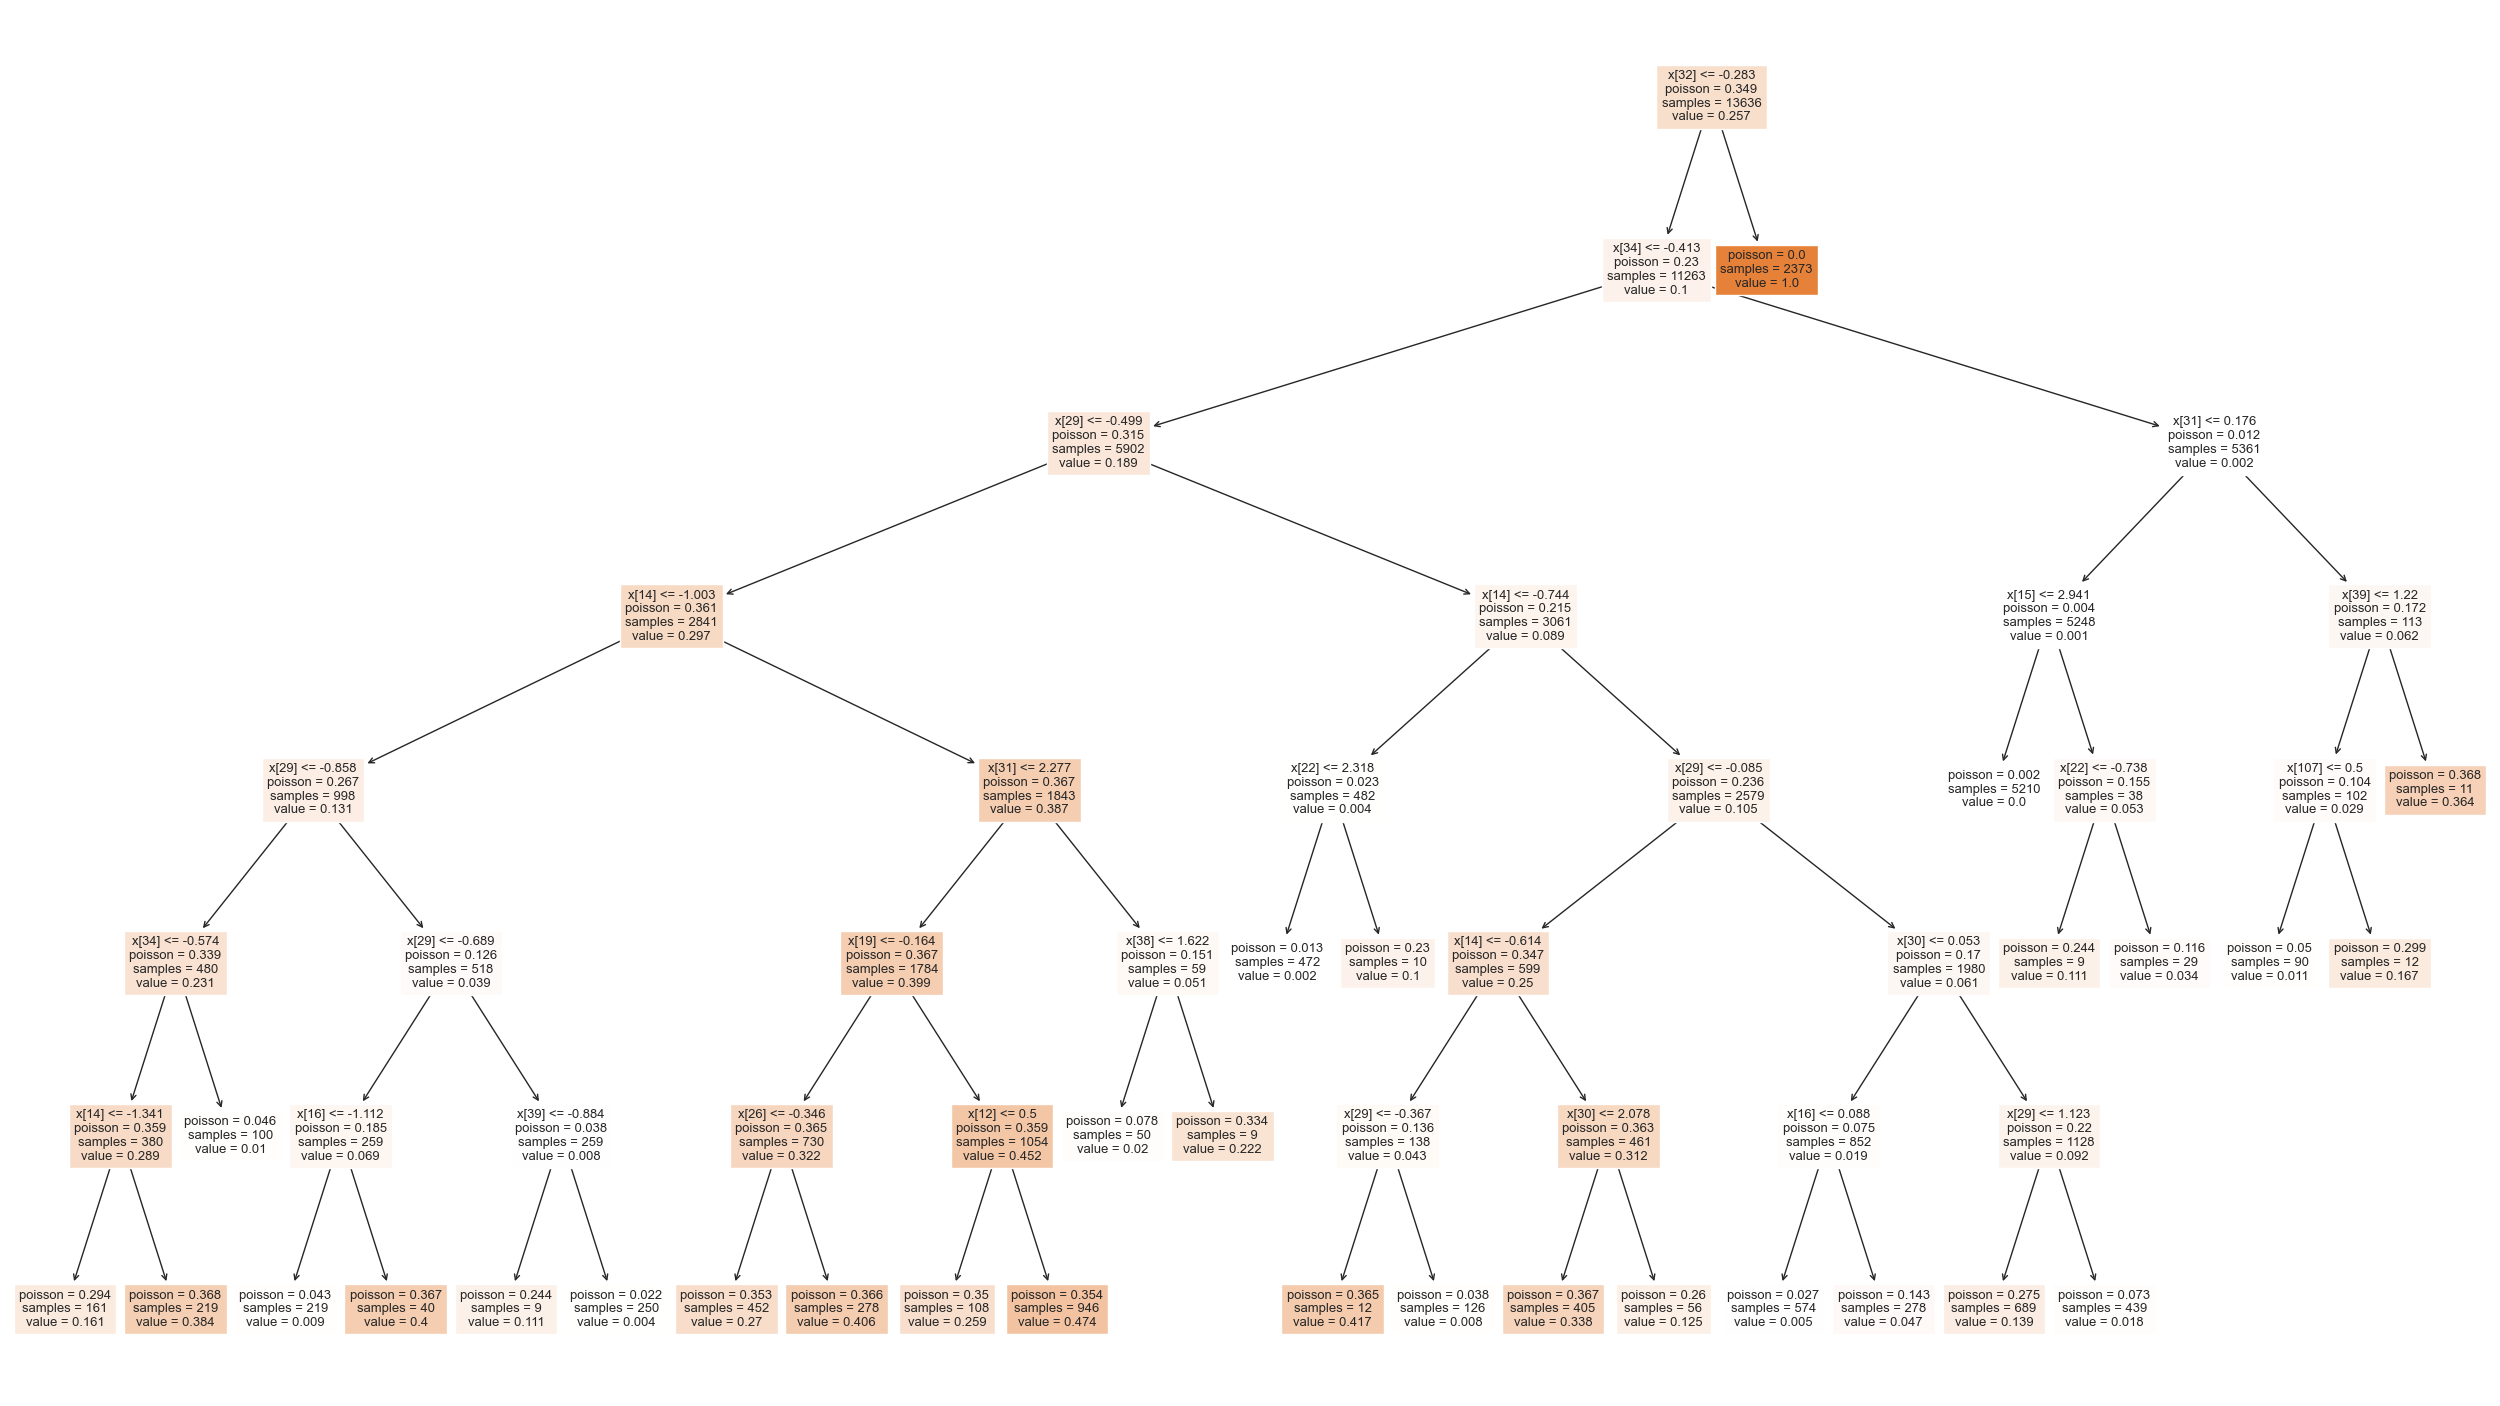

In [140]:
from sklearn import tree
fig = plt.figure(figsize=(32,18))
sh = tree.plot_tree(dec_tree, filled=True)

### Висновок для DecisionTree
В основному ця модель стабільно показує один з найвищих результатів на тестовій вибірці. Цікаво, що найкращим параметром для `max_features` став `auto`, тобто дерево розглядає всі ознаки при кожному поділі. Найвищий коефіцієнт детермінації `0.7188` при використанні стандартного набору кроків і підбору параметрів.

### RandomForestRegressor
Розглянемо тепер ліс зі стандартними параметрами без додаткових кроків навчання

In [66]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=4)
column_transformer = ColumnTransformer([
    ("passthrough", "passthrough", numeric_features)
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', forest)
])
output(pipeline, 3, title=True)

----------RandomForestRegressor(random_state=4)----------
---Null Handling v3---
Test R2: 0.7243
Train R2: 0.96


Бачимо, що зразу отримали найкращі результати на тестовій вибірці порівняно з іншими моделями. Знову присутнє перенавчання. Постараємось виправити це, підібравши найкращі параметри глибини. Також додамо бінаризацію і `One_hot` кодування

In [67]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', forest.set_params(max_depth = 20, n_estimators=300, min_samples_leaf=2, random_state=4, n_jobs=-1))
])
output(pipeline, 3, title=True, best_tree=True)

----------RandomForestRegressor(criterion='poisson', max_depth=11, max_features='sqrt',
                      min_samples_leaf=5, n_jobs=-1, random_state=4)----------
---Null Handling v3---
Test R2: 0.7257
Train R2: 0.7607


In [68]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', forest.set_params(max_depth = 20, n_estimators=300, min_samples_leaf=2, random_state=4, n_jobs=-1))
])
output(pipeline, 3, title=True)

----------RandomForestRegressor(criterion='poisson', max_depth=20, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=300, n_jobs=-1,
                      random_state=4)----------
---Null Handling v3---
Test R2: 0.7313
Train R2: 0.8535


Це допомогло зменшити перенавчання і незначно покращити результат

Знову спробуємо поексперементувати з кількістю ознак і об'єктів, а також з методом поводження з пропущеними значеннями

In [69]:
delete = outliers(X_nn_all[2][1], numeric_features, 9)
X_nn_all[2][1].drop(delete, inplace=True)
X_nn_all[2][0].drop(delete, inplace=True)
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical1),
    ("scaler", StandardScaler(), lin_selected),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), lin_selected),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', forest.set_params(max_depth=25))
])
output(pipeline, 3, title=True) 
get_original()

----------RandomForestRegressor(criterion='poisson', max_depth=25, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=300, n_jobs=-1,
                      random_state=4)----------
---Null Handling v3---
Test R2: 0.7253
Train R2: 0.8471


Результати майже не змінились

### Висновок для RandomForestRegressor
Модель, очевидно, є однією з найпродвинутіших, тому видає найкращі результати. Проблемою є складне підбирання гіперпараметрів, адже воно займає надто багато часу. Тому не вдалось значно покращити результат моделі порівняно з початковим значенням. Загалом, найкращий результат на відкладеній вибірці `0.7367`

### 3. Зробити висновки і обрати найкращу модель яка розв'язує задачу регресії. Для найкращої моделі знайти прогнози на вибірці `predict.csv`. Значення прогнозів зберегти у файл `predictions_reg.csv`.



Всі висновки можна побачити впродовж завдання 2. Найкращий результат показала модель `RandomForest` з `One-Hot` кодуванням, бінаризацією і скейлингом і з підібраними параметрами. Зробимо фінальні передбачення за допомогою неї

Зчитуєм дані і робимо всі необхідні перетворення

In [70]:
predict = pd.read_csv("predict.csv")
predict["emp_length"] = predict["emp_length"].map(lambda x: x if type(x) == float else 10 if "10+" in x else 0 if "<" in x else x[0]).astype("float64")
predict['emp_length'] = predict['emp_length'].fillna(loans_nonull_v3['emp_length'].mean())
predict['tot_coll_amt'] = predict['tot_coll_amt'].fillna(loans['tot_coll_amt'].median())
predict['tot_cur_bal'] = predict['tot_cur_bal'].fillna(loans['tot_cur_bal'].median())
predict['total_rev_hi_lim'] = predict['total_rev_hi_lim'].fillna(loans['total_rev_hi_lim'].median())
predict['revol_util'] = predict['revol_util'].fillna(loans['revol_util'].median())
bins = [0, 15, 30, 50, 135] 
labels = ['0-15', '15-30', '30-50', '50-135'] 
predict["mths_since_last_delinq"] = pd.cut(predict["mths_since_last_delinq"], bins=bins, labels=labels).astype("object").fillna("No deliquency")

In [71]:
y, X = X_nn_all[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical1),
    ("scaler", StandardScaler(), lin_selected),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), lin_selected),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', forest)
])
pipeline.fit(X_train, y_train)
print()

In [72]:
# Зберегти прогнози у змінну best_reg_model_predictions
best_reg_model_predictions = pipeline.predict(predict)

In [73]:
# Запустити для створення файлу
pd.Series(best_reg_model_predictions).to_csv('predictions_reg.csv')

## 4. **Задача класифікації**. 

Імпортувати наново датасет `data.csv`. Вважаючи `loan_status` цільовою змінною розв'язати задачу п'ятикласової класифікації. Використати різні підходи експерементуючи з параметрами як у пункті 2. Розглянути :

   * логістичну регресію
   * метод опорних векторів (`sklearn.svm.SVC`)
   * метод найближчих сусідів (`sklearn.neighbors.KNeighborsClassifier`)
   * дерево прийняття рішень (`sklearn.tree.DecisionTreeClassifier`)
   * випадковий ліс (`sklearn.ensemble.RandomForestClassifier`)

   В кожному випадку знайти середню точність (accuracy) для найкращої моделі на відкладеній вибірці.




## Pre-Analysis
Спочатку проведемо детальніший аналіз для цього завдання

<Axes: xlabel='loan_status', ylabel='count'>

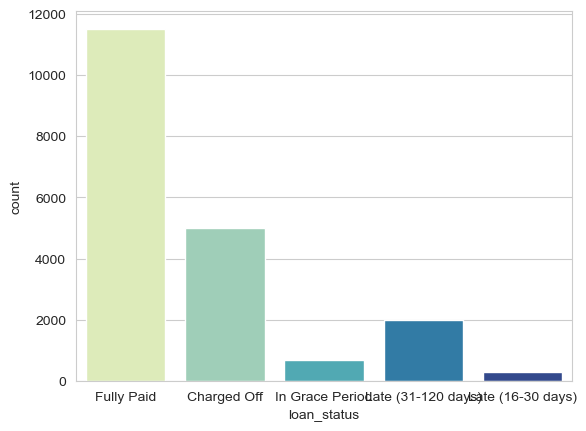

In [74]:
loans_class = loans.copy()
sns.countplot(x='loan_status',data=loans_class, palette="YlGnBu")

In [75]:
loans_class.groupby("loan_status").apply(lambda df: str(round(df["loan_amnt"].count()/loans_class["loan_amnt"].count() * 100, 2)) + "%")

loan_status
Charged Off           25.64%
Fully Paid            58.97%
In Grace Period        3.59%
Late (16-30 days)      1.54%
Late (31-120 days)    10.26%
dtype: object

Як було сказано раніше, маємо значну нестабільність класів (значно більшу, ніж в завданні регресії), тому обов'язково будемо використовувати методи зі `stratify`, щоб зберегти відсотковий баланс класів при поділі і крос-валідації

Подивимось також на залежність статусу кредиту від його оцінки

In [76]:
loans_class.groupby("grade")["loan_status"].agg(pd.Series.mode)

grade
A     Fully Paid
B     Fully Paid
C     Fully Paid
D     Fully Paid
E    Charged Off
F    Charged Off
G    Charged Off
Name: loan_status, dtype: object

In [77]:
gr = pd.DataFrame(loans_class.groupby(["grade","loan_status"]).apply(lambda df: round(df["loan_amnt"].count()/loans.groupby("grade")["loan_amnt"].count().loc[df["grade"].iloc[0]] * 100, 2))).rename(columns={0: "Percentage"})
gr

Percentage
grade loan_status                   
A     Charged Off               9.52
      Fully Paid               83.38
      In Grace Period           1.87
      Late (16-30 days)         0.92
      Late (31-120 days)        4.32
B     Charged Off              18.29
      Fully Paid               69.42
      In Grace Period           2.61
      Late (16-30 days)         1.13
      Late (31-120 days)        8.55
C     Charged Off              28.43
      Fully Paid               53.76
      In Grace Period           4.50
      Late (16-30 days)         1.86
      Late (31-120 days)       11.44
D     Charged Off              33.50
      Fully Paid               45.98
      In Grace Period           5.15
      Late (16-30 days)         1.97
      Late (31-120 days)       13.40
E     Charged Off              40.78
      Fully Paid               40.72
      In Grace Period           2.94
      Late (16-30 days)         1.66
      Late (31-120 days)       13.89
F     Charged Off              48.83
      Fully Paid               32.25
      In Grace Period           3.60
      Late (16-30 days)         1.62
      Late (31-120 days)       13.69
G     Charged Off              49.13
      Fully Paid               29.48
      In Grace Period           5.78
      Late (16-30 days)         3.47
      Late (31-120 days)       12.14

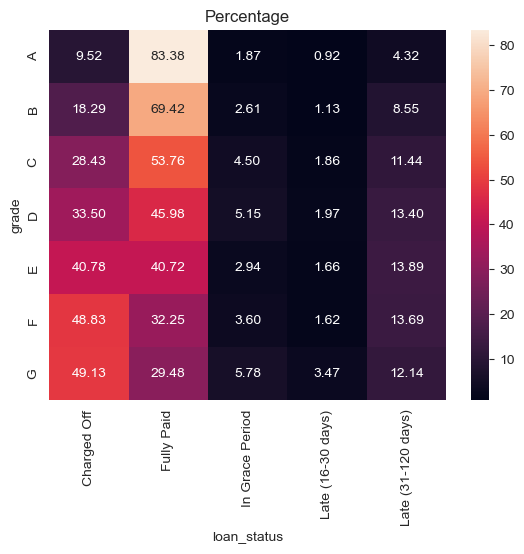

In [78]:
sns.heatmap(gr.reset_index().pivot(index="grade", columns="loan_status", values="Percentage"), annot=True, fmt=".2f")
plt.title("Percentage")
plt.show()

## Classification

Утворимо 3 вибірки відповідно до наших методів `Null Handling`

In [79]:
X_nn_all_class = []
def get_original_class():
    global loans_nonull_v1, loans_nonull_v2, loans_nonull_v3,  X_nn_all_class
    X_nn_all_class = []
    for loan in (loans_nonull_v1, loans_nonull_v2, loans_nonull_v3):
        X_nn_all_class.append((loan["loan_status"], loan.drop(columns=["loan_status"])))
    #((y_v1, X_v1), (y_v2, X_v2), (y_v3, X_v3)) = X_nn_all
get_original_class()

Оскільки матимемо багато моделей і різні варіанти роботи з пропущеними даними, то напишемо функцію, яка буде приймати параметри нашого навчання і видавати результат:

## Метрики якості класифікатора
### Бінарні метрики


Для оцінки якості використовують *матрицю помилок*: 
рядки відповідають прогнозам моделі, а стовпці -- істинним відповідям.


|  |y = +1|y = -1|
|-------|:------:|:------:|
|   **a(x) = +1**  | TP| FP |
| **a(x) = -1**| FN | TN |

Головна діагональ матриці помилок містить кількість правильно класифікованих об'єктів.

Метрики якості класифікації : 
  - Частка правильних відповідей (Accuracy):
  $$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$
  - Точність/precision (частка справді позитивних об'єктів серед об'єктів які алгоритм вважає позитивними):
  $$precision = \frac{TP}{TP + FP}$$
  - Повнота/recall (частка правильно класифікованих позитивних об'єктів серед усіх позитивних об'єктів вибірки):
  $$recall = \frac{TP}{TP + FN}$$
  - $F_1$-міра (середнє гармонійне між точністю та повнотою)
  $$F_1 = \frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$$
  

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

def output_class(pipeline=None, null_handle_v=3, all_metrics=False, stratify=False, title=False, best_log=False, best_svm=False, best_knn=False, best_tree=False, best_forest=False, curves=False):
    global X_nn_all_class
    y, X = X_nn_all_class[null_handle_v - 1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, stratify = y if stratify else None)
    if best_log:
        param_grid = {
            "regression__C": np.logspace(-2, 3, 20),
            "regression__penalty": ["l1","l2"],
            #"regression__solver": ["lbfgs", "saga", "newton-cg"]
        }
        searcher = GridSearchCV(pipeline, [param_grid], n_jobs=-1, scoring= "accuracy", cv = 10)
        searcher.fit(X_train, y_train)
        best = {name[name.find("__") + 2:]: val for name, val in searcher.best_params_.items()}
        pipeline[1].set_params(**best)
    if best_svm:
        C = np.logspace(-3, 2, 40)
        searcher = RandomizedSearchCV(pipeline, [{"regression__C": C}],
                        scoring="accuracy", cv=3, n_jobs=-1, random_state=4)
        searcher.fit(X_train, y_train)
        best_C = searcher.best_params_["regression__C"]
        pipeline[1].set_params(C=best_C)
    if best_knn:
        param_grid = {
            'regression__n_neighbors' : range(4, 20),
            'regression__weights' : ['uniform','distance'],
            'regression__p' : [1,2]
        }
        searcher = GridSearchCV(pipeline, [param_grid],
                        scoring="accuracy", cv=5, n_jobs=-1)
        searcher.fit(X_train, y_train)
        best = {name[name.find("__") + 2:]: val for name, val in searcher.best_params_.items()}
        pipeline[1].set_params(**best)
    if best_tree:
        param_grid = {
            "regression__criterion": ["gini", "entropy", "log_loss"],
            "regression__max_depth" : [None, 1,3,5,7,9,11],
            "regression__min_samples_leaf":[10, 20, 30, 50, 70, 100],
            "regression__min_samples_split":[2,3,5,7,9],
            #"regression__min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
            "regression__max_features":["auto","sqrt"],
            #"regression__max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90],
        }
        if type(pipeline[1]) == sklearn.ensemble._forest.RandomForestRegressor:
            param_grid["regression__n_estimators"] = [50, 100, 150, 200]
            param_grid["regression__min_samples_leaf"] = [1, 2, 5, 10]
        searcher = GridSearchCV(pipeline, [param_grid],
                        scoring="accuracy", cv=5, n_jobs=-1)
        searcher.fit(X_train, y_train)
        best = {name[name.find("__") + 2:]: val for name, val in searcher.best_params_.items()}
        pipeline[1].set_params(**best)
    if best_forest:
        param_grid = {
            "regression__criterion": ["gini", "entropy", "log_loss"],
            "regression__max_depth" : [None, 1,3,5,7,9,11],
            "regression__min_samples_leaf":[1, 2, 5, 10, 15],
            "regression__min_samples_split":[2,3,5,7,9],
            "regression__max_features":["auto","sqrt"],
            "regression__n_estimators": [50, 100, 150, 200]
        }
        searcher = RandomizedSearchCV(pipeline, [param_grid],
                        scoring="accuracy", cv=3, n_jobs=-1, n_iter = 20, random_state=4)
        searcher.fit(X_train, y_train)
        best = {name[name.find("__") + 2:]: val for name, val in searcher.best_params_.items()}
        pipeline[1].set_params(**best)
            
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_pred = pipeline.predict(X_test)
    if title:
        print("-"*10 + f"{pipeline[1]}" + "-"*10)
    print(f"---Null Handling v{null_handle_v}---")
    print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred), 4)}")
    print(f"Train Accuracy: {round(accuracy_score(y_train, y_train_pred), 4)}")
    if all_metrics:
        for metric, scorer in {"Precision":precision_score,"Recall":recall_score,"F1":f1_score, "ROC_AUC":roc_auc_score}.items():
            print()
            print(f"Test {metric}: {round(scorer(y_test, y_pred), 4)}")
            print(f"Train {metric}: {round(scorer(y_train, y_train_pred), 4)}")
    if curves:
        fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr)
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.show()
        print(auc(fpr, tpr))
        
        precision, recall, thresholds = precision_recall_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
        plt.plot(recall, precision)
        plt.xlabel('recall')
        plt.ylabel('precision')
        plt.show()
        print(auc(recall, precision))

### Feature Selection
Аналогічно до задачі регресії виберемо потрібні ознаки

#### 1. Прибиремо ознаки, які мають високу кореляцію одна з одною
Врахуємо, що в задачі регресії наш `low_corr` значно погіршував ситуацію, тому приберемо лише ознаки з кореляціє >0.95

In [81]:
numeric_features = loans_nonull_v2.select_dtypes([np.number]).columns
low_corr = numeric_features.drop(['total_pymnt_inv', 'total_rec_prncp'])

#### 2. Спробуємо скористатись `SequentialFeatureSelector` для підбору важливих ознак
Для задачі класифікації використаємо в якості моделі для підбору LogisticRegression()

In [82]:
sfs = SequentialFeatureSelector(LogisticRegression(), n_jobs = -1)
y, X = X_nn_all_class[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=4)
scaler=StandardScaler()
scaled = scaler.fit_transform(X_train[numeric_features])
sfs.fit(scaled, y_train)
log_selected = numeric_features[sfs.get_support()]

In [83]:
log_selected

Index(['loan_amnt', 'installment', 'revol_util', 'total_acc', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'tot_coll_amt'],
      dtype='object')

### LogisticRegression

Натренуємо просту модель логістичної регресії без додаткових кроків навчання. Для цього завдання зазвичай будемо використовувати `stratify` 

In [84]:
log_reg = LogisticRegression()
numeric_features = loans_nonull_v2.select_dtypes([np.number]).columns

column_transformer = ColumnTransformer([
    ("passthrough", "passthrough", numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', log_reg)
])
for i in range(3):
    output_class(pipeline, i+1, title=True if i == 0 else False, stratify=True)

----------LogisticRegression()----------
---Null Handling v1---
Test Accuracy: 0.8468
Train Accuracy: 0.8467
---Null Handling v2---
Test Accuracy: 0.8447
Train Accuracy: 0.8471
---Null Handling v3---
Test Accuracy: 0.8436
Train Accuracy: 0.845


Бачимо, що результат непоганий. Всі види `null handling` дають однаковий результат. Спробуємо додати наші стандартні кроки навчання, продовжимо використовувати v3

In [85]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', log_reg)
])
output_class(pipeline, 3, title=True, stratify=True)

----------LogisticRegression()----------
---Null Handling v3---
Test Accuracy: 0.8695
Train Accuracy: 0.8808


Результат незначно покращився. Спробуєио підібрати найкращі параметри для логістичної регресії за допомогою крос-валідації

In [86]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', log_reg)
])
output_class(pipeline, 3, title=True, stratify=True, best_log=True)

----------LogisticRegression(C=26.366508987303583)----------
---Null Handling v3---
Test Accuracy: 0.8715
Train Accuracy: 0.8814


Бачимо, що результат незначно покращився, регуляризація залишилась дефолтною `l2`

Спробуємо використати `class_weight=balanced` для нашої моделі, а також поексперементувати з `solver`. Це може покращити результати при незбалансованих класах

In [87]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', log_reg.set_params(solver="saga"))
])
output_class(pipeline, 3, title=True, stratify=True)
log_reg.set_params(class_weight='balanced')
output_class(pipeline, 3, title=True, stratify=True)
log_reg.set_params(class_weight=None, solver="lbfgs")

----------LogisticRegression(C=26.366508987303583, solver='saga')----------
---Null Handling v3---
Test Accuracy: 0.8688
Train Accuracy: 0.8777
----------LogisticRegression(C=26.366508987303583, class_weight='balanced', solver='saga')----------
---Null Handling v3---
Test Accuracy: 0.8094
Train Accuracy: 0.8291


LogisticRegression(C=26.366508987303583)

Новий `solver = saga` майже не змінив ситуацію, але він вважається швидшим для роботи з великою кількістю об'єктів. Збалансовані ваги класів погіршили результат, можливо це пов'язано з тим, що наші малі класи отримали занадто велику вагу, оскільки мають всього 2-3% від всіх даних

Наостанок поексперементуємо з кількістю ознак і об'єктів, видаляючи аномалії і корелюючі ознаки, а також глянемо на інші `null handle`

In [88]:
delete = outliers(X_nn_all_class[2][1], numeric_features, 9)
X_nn_all_class[2][1].drop(delete, inplace=True)
X_nn_all_class[2][0].drop(delete, inplace=True)
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical2),
    ("scaler", StandardScaler(), low_corr),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), low_corr),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', log_reg)
])
output_class(pipeline, 2, title=True, stratify=True)
get_original_class()

----------LogisticRegression(C=26.366508987303583)----------
---Null Handling v2---
Test Accuracy: 0.8759
Train Accuracy: 0.8817


Бачимо, що результат знову незначно покращився. Що цікаво, використання `log_selected` погіршило ситуацію, а `lin_selected` покращило. В результаті використали `Null Handling v2` i `low_corr`

### Висновок для LogisticRegression
Модель стабільно дає непоганий результат. Найкраща точність отрималась з стандартним набором кроків навчання і підбором коефіцієнту регуляризації, а також видаленням деяких ознак і аномальних об'єктів. Загалом найкраща точність на тестовій вибірці `0.8759`

### SVMClassifier

Навчимо стандартну модель опорних векторів, ядро `rbf`:

In [89]:
from sklearn.svm import SVC
svc = SVC()
column_transformer = ColumnTransformer([
    ("passthrough", "passthrough", numeric_features)
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', svc)
])
output_class(pipeline, 3, title=True, stratify=True)

----------SVC()----------
---Null Handling v3---
Test Accuracy: 0.7726
Train Accuracy: 0.776


Бачимо, що результати гірші, порівняно з моделлю логістичної регресії. спробуємо додати скейлинг, бінаризацію і `One-Hot`, a також подивитись на `PolynomialFeatures`:

In [90]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', svc)
])
output_class(pipeline, 3, title=True,  stratify=True)

----------SVC()----------
---Null Handling v3---
Test Accuracy: 0.8583
Train Accuracy: 0.8978


Результат значно покращився (`PolynomialFeatures` спричинили перенавчання), спробуємо підібрати найкращий параметр регуляризації:

In [91]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', svc)
])
output_class(pipeline, 3, title=True, stratify=True, best_svm=True)

----------SVC(C=2.154434690031882)----------
---Null Handling v3---
Test Accuracy: 0.8602
Train Accuracy: 0.9267


Результат знову незначно окращився, але збільшилось перенавчання (оскільки підібрався параметр регуляризації, який передбачає її послаблення)

Також можемо знову поставити `class_weight = balanced` і поексперементувати з `kernel`:

In [92]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', svc.set_params(class_weight="balanced", kernel="rbf"))
])
output_class(pipeline, 3, title=True, stratify=True, best_svm=True)
svc.set_params(class_weight=None, kernel="sigmoid")
output_class(pipeline, 3, title=True, stratify=True)
svc.set_params(kernel="poly")
output_class(pipeline, 3, title=True, stratify=True)
svc.set_params(kernel="rbf")

----------SVC(C=100.0, class_weight='balanced')----------
---Null Handling v3---
Test Accuracy: 0.85
Train Accuracy: 1.0
----------SVC(C=100.0, kernel='sigmoid')----------
---Null Handling v3---
Test Accuracy: 0.7788
Train Accuracy: 0.7771
----------SVC(C=100.0, kernel='poly')----------
---Null Handling v3---
Test Accuracy: 0.847
Train Accuracy: 1.0


SVC(C=100.0)

Збалансовані ваги класів майже не змінили результат, ядро `sigmoid` дає відчутно гірші результати, як і в задачі регресії, а `poly` працює непогано, хоч і дає значне перенавчання

Наостанок поексперементуємо з нашими `log_selected`, `low_corr` ознаками, аномальними об'єктами і типами `null handling` .

In [143]:
delete = outliers(X_nn_all_class[2][1], numeric_features, 9)
X_nn_all_class[1][1].drop(delete, inplace=True)
X_nn_all_class[1][0].drop(delete, inplace=True)
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical1),
    ("scaler", StandardScaler(), lin_selected),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), lin_selected),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', svc.set_params(C=2.154434690031882))
])
output_class(pipeline, 3, title=True, stratify=True)
get_original_class()

----------SVC(C=2.154434690031882)----------
---Null Handling v3---
Test Accuracy: 0.8606
Train Accuracy: 0.9164


Загалом на результат це майже не впливає (в задачі класифікації не така значна зміна кількості об'єктів, чи ознак може не змінити клас більшості об'єктів). Цікаво зауважити, що `lin_selected` знову дали кращий результат

### Висновок для SVMClassifier
Аналогічно, як і в задачі регресії, метод опорних векторів дав стабільно непоганий результат, подібний до результату логістичної регресії. Найкращим ядром залишилось `rbf`. Підбір найкращого параметра збільшив перенавчання. Загалом найкращий результат точності на відкладеній вибірці `0.8606`

### KNN Classifier
Для задачі класифікації `KNeighborsRegressor` працює таким чином, що призначає об'єкт в клас, який є найчисельнішим сере k найближчих сусідів. 

Спробуємо KNN для 1 сусіда з стандартною Евклідовою відстанню і без додаткових кроків навчання: 

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn_class = KNeighborsClassifier(n_neighbors=1)
column_transformer = ColumnTransformer([
    ("passthrough", "passthrough", numeric_features)
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', knn_class)
])
output_class(pipeline, 3, title=True, stratify=True)

----------KNeighborsClassifier(n_neighbors=1)----------
---Null Handling v3---
Test Accuracy: 0.6671
Train Accuracy: 1.0


Не надто поганий результат, порівняя з 1NN для регресії. Спробуємо 5 сусідів зі скейлингом ознак:

In [94]:
column_transformer = ColumnTransformer([
    ("scaler", StandardScaler(), numeric_features)
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', knn_class.set_params(n_neighbors=5))
])
output_class(pipeline, 3, title=True, stratify=True)

----------KNeighborsClassifier()----------
---Null Handling v3---
Test Accuracy: 0.7704
Train Accuracy: 0.8321


Бачимо, що зразу покращився результат і зменшилось "перенавчання". Додамо `One-Hot` і бінаризацію і спробуємо підібрати найкращу кількість сусідів і метрику відстані для моделі  

In [95]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', knn_class.set_params(n_jobs=-1))
])
output_class(pipeline, 3, title=True, best_knn=True, stratify=True)

----------KNeighborsClassifier(n_jobs=-1, n_neighbors=9, p=1)----------
---Null Handling v3---
Test Accuracy: 0.8212
Train Accuracy: 0.8464


На відміну від задачі регресії, тут найкраща кількість сусідів доволі низька, а найкращою метрикою відстані все ще є `manhattan_distance`

На останок знову спробуємо вирізати колонки з високою кореляцією між собою і аномальні об'єкти, також спробуємо `Null Handling v1, v2`

In [96]:
delete = outliers(X_nn_all_class[0][1], numeric_features, 9)
X_nn_all_class[0][1].drop(delete, inplace=True)
X_nn_all_class[0][0].drop(delete, inplace=True)
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', knn_class)
])
output_class(pipeline, 1, title=True, stratify=True)
get_original_class()

----------KNeighborsClassifier(n_jobs=-1, n_neighbors=9, p=1)----------
---Null Handling v1---
Test Accuracy: 0.8304
Train Accuracy: 0.8494


`low_corr` ознаки незначно погіршили ситуацію, але вирізання об'єктів-аномалій і `Null Handling v1` показали кращий результат

### Висновок для KNN Classifier
Можемо провести аналогію до задачі регресії, де KNN не показував найкращих результатів, але працював значно швидше, що допомагало з підбором параметрів і загальними експериментами з кількістю і складом ознак. Найкращою стала модель зі стандартними кроками навчання, і підбором кількості сусідів, метрики і ваги сусіда за допомогою крос-валідації. Найкраща точність: `0.8304`

### DecisionTreeClassifier
Спробуємо спочатку навчити дерево з стандартними параметрами без додаткових кроків навчання

In [97]:
from sklearn.tree import DecisionTreeClassifier
dec_tree_class = DecisionTreeClassifier(random_state=4)
column_transformer = ColumnTransformer([
    ("passthrough", "passthrough", numeric_features)
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', dec_tree_class)
])
output_class(pipeline, 3, title=True, stratify=True)

----------DecisionTreeClassifier(random_state=4)----------
---Null Handling v3---
Test Accuracy: 0.8339
Train Accuracy: 1.0


Відразу отримали непоганий результат, але присутнє перенавчання. Це можна виправити підібравши глибину дерева. Зробимо це, паралельно додавши скейлинг ознак

In [98]:
column_transformer = ColumnTransformer([
    ("scaler", StandardScaler(), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', dec_tree_class)
])
output_class(pipeline, 3, title=True, stratify=True, best_tree=True)

----------DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       min_samples_leaf=30, random_state=4)----------
---Null Handling v3---
Test Accuracy: 0.8371
Train Accuracy: 0.8559


Бачимо, що це допомогло з перенавчанням і незначно покращило результати. Цікаво, що підбір параметрів відбувався значно швидше у порівнянні з задачею регресії. Додамо бінаризацію і `One-Hot` і спробуємо підібрати параметри ще раз.

In [99]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', dec_tree_class)
])
output_class(pipeline, 3, title=True, stratify=True, best_tree=True)

----------DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features='auto',
                       min_samples_leaf=10, random_state=4)----------
---Null Handling v3---
Test Accuracy: 0.8294
Train Accuracy: 0.8448


Цього разу результат з бінаризацією і `One-Hot` гірший. Тому продовжуємо використовувати модель тільки зі скейлингом. Вернемо найкращі параметри

In [100]:
dec_tree_class.set_params(max_depth=None, min_samples_leaf=30)

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       min_samples_leaf=30, random_state=4)

Наостанок поексперементуємо з `low_corr` ознаками, аномальними об'єктами і `Null Handling v1, v2`

In [101]:
delete = outliers(X_nn_all_class[2][1], numeric_features, 9)
X_nn_all_class[2][1].drop(delete, inplace=True)
X_nn_all_class[2][0].drop(delete, inplace=True)
column_transformer = ColumnTransformer([
    ("scaler", StandardScaler(), numeric_features)
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', dec_tree_class)
])
output_class(pipeline, 1, title=True)
output_class(pipeline, 2, )
output_class(pipeline, 3)
get_original_class()

----------DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       min_samples_leaf=30, random_state=4)----------
---Null Handling v1---
Test Accuracy: 0.8407
Train Accuracy: 0.8667
---Null Handling v2---
Test Accuracy: 0.8326
Train Accuracy: 0.8578
---Null Handling v3---
Test Accuracy: 0.8401
Train Accuracy: 0.8568


`low_corr` негативно вплинула на результати, а об'єкти-аномаліїї їх не змінили. Цікаво, що результат незначно покращився без параметру `stratify`. Найкращий рузльтат оказує `Null Handling v1` 

### Висновок для DecisionTreeClassifier
Аналогічно до задачі регресіїї, модель дає стабільний високий результат. Цікаво, що гіперпараметри для класифікатора підбирались настільки швидко (відносно), що була можливість замінити `RandomizedSearchCV` на `GridSearchCV` і збільшити поле параметрів. Найкращий результат точності `0.84` отримався при навчанні зі скейлингом ознак, `Null Handling v1` і підборі найкращих параметрів, зокрема критерій поділу, яким став `entropy`.

1. Ентропійний критерій :
$$
IGain\bigr(p, n\bigr) = h\bigr(\frac{P}{l}\bigr) - \frac{p+n}{l}h\bigr(\frac{p}{p+n}\bigr) - \frac{l-p-n}{l}h\bigr(\frac{P-p}{l-p-n}\bigr),
$$
де $h\bigr(q\bigr)=-q\log_2 q - \bigr(1-q\bigr)\log_2\bigr(1-q\bigr)$.
2. Критерій Джині:
$$
IGini\bigr(p,n\bigr) = IGain\bigr(p,n\bigr), \quad  h\bigr(q\bigr)=4q\left(1-q\right)
$$
3. критерій бустинга:
$$
BC\bigr(p, n\bigr) = \sqrt{p} - \sqrt{n}
$$

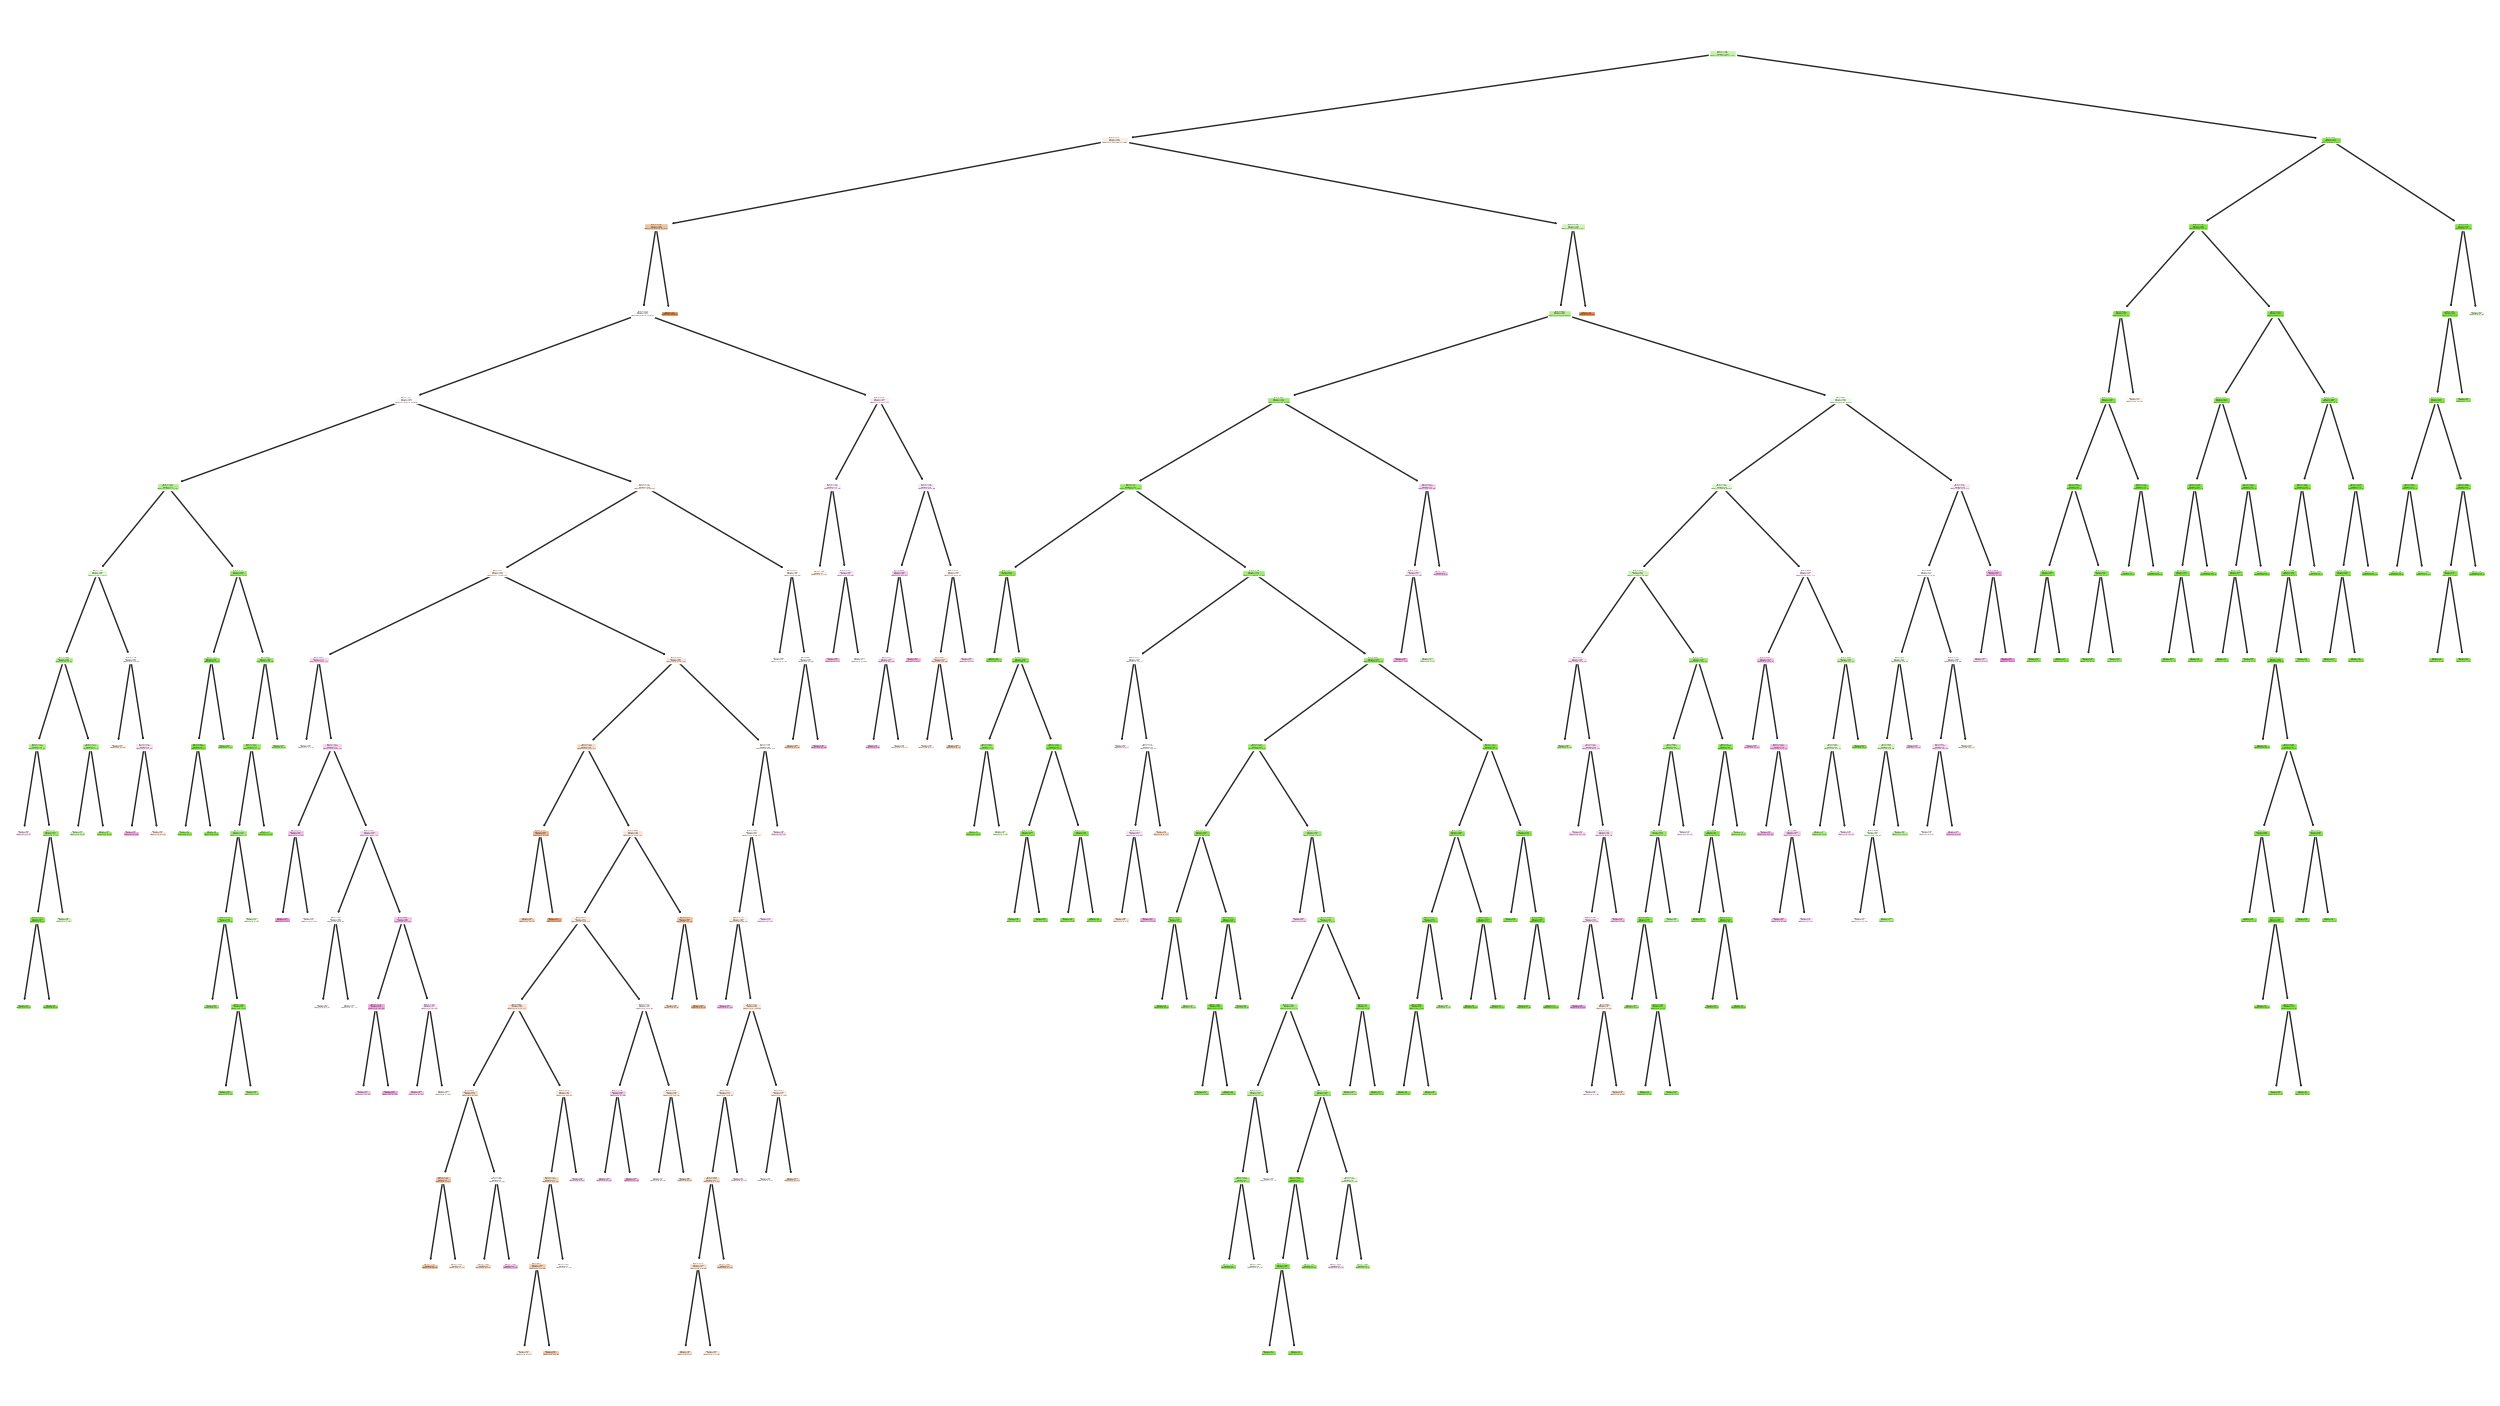

In [102]:
from sklearn import tree
fig = plt.figure(figsize=(32,18))
sh = tree.plot_tree(dec_tree_class, filled=True)

### RandomForestClassifier
Розглянемо тепер ліс зі стандартними параметрами без додаткових кроків навчання

In [103]:
from sklearn.ensemble import RandomForestClassifier
forest_class = RandomForestClassifier(random_state=4)
column_transformer = ColumnTransformer([
    ("passthrough", "passthrough", numeric_features)
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', forest_class)
])
output_class(pipeline, 3, title=True, stratify=True)

----------RandomForestClassifier(random_state=4)----------
---Null Handling v3---
Test Accuracy: 0.8631
Train Accuracy: 1.0


Знову отримали один з найкращих результатів, але з присутністю перенавчання. Постараємось виправити це, підібравши найкращі параметри глибини, а також додамо скейлинг, бінаризацію і `One-Hot` кодування

In [104]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', forest_class)
])
output_class(pipeline, 3, title=True, stratify=True, best_forest=True)

----------RandomForestClassifier(criterion='entropy', max_features='auto',
                       min_samples_split=5, n_estimators=200, random_state=4)----------
---Null Handling v3---
Test Accuracy: 0.8614
Train Accuracy: 0.9972


In [105]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', forest_class.set_params(max_depth=12))
])
output_class(pipeline, 3, title=True, stratify=True)

----------RandomForestClassifier(criterion='entropy', max_depth=12, max_features='auto',
                       min_samples_split=5, n_estimators=200, random_state=4)----------
---Null Handling v3---
Test Accuracy: 0.8621
Train Accuracy: 0.9333


Поексперементувавши з глибиною і підбором найкращих параметрів, вдалось знизити перенавчання без втрати точності на тестовій вибірці. Знову ж так, швидкість підбору для задачі класифікації була відчутно більша

Знову спробуємо експерементувати з `low_corr` ознаками і об'єктами з великою кількістю аномальних ознак. Подивимось на інші результати `Null Handling`

In [106]:
delete = outliers(X_nn_all_class[2][1], numeric_features, 8)
X_nn_all_class[2][1].drop(delete, inplace=True)
X_nn_all_class[2][0].drop(delete, inplace=True)
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical1),
    ("scaler", StandardScaler(), log_selected),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), log_selected),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', forest_class)
])
output_class(pipeline, 3, title=True, stratify=True)
get_original_class()

----------RandomForestClassifier(criterion='entropy', max_depth=12, max_features='auto',
                       min_samples_split=5, n_estimators=200, random_state=4)----------
---Null Handling v3---
Test Accuracy: 0.8632
Train Accuracy: 0.9242


Найкращий результат тепер дав все той же `Null Handling v3`, але з `log_selected` ознаками і видаленням аномалій

### Висновок для RandomForestClassifier
Цього разу результат цієї моделі не є очевидно найкращим, адже вона показує точність `0.8632`(зі стандартними кроками навчання, підбором найкращих параметрів при `max_depth = 12` на `log_selected` ознаках з видаленням аномалій), що є на рівні з логістичною регресією. Звичайно, ліс показує більш стабільні результати, тому якщо порівняти ці дві моделі за допомогою крос-валідації або при різних `random_state` на поділі даних, то кращою моделлю для фінального прогнозу все-таки буде RandomForest.


### 5. Зробити висновки і обрати найкращу модель яка розв'язує задачу класифікації. Для найкращої моделі знайти прогнози на вибірці `predict.csv`. Значення прогнозів зберегти у файл `predictions_clf.csv`.
    


Висновки можна побачити впродовж всього завдання 4. Найкращою моделлю є `RandomForest`, описаний в останньому висновку. Зробимо предікшин за допомогою нього.

In [107]:
delete = outliers(X_nn_all_class[2][1], numeric_features, 8)
X_nn_all_class[2][1].drop(delete, inplace=True)
X_nn_all_class[2][0].drop(delete, inplace=True)
y, X = X_nn_all_class[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, stratify=y)
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical1),
    ("scaler", StandardScaler(), log_selected),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), log_selected),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', forest_class)
])
pipeline.fit(X_train, y_train)
get_original_class()

In [109]:
# Зберегти прогнози у змінну best_clf_model_predictions
best_clf_model_predictions = pipeline.predict(predict)

In [110]:
# Запустити для створення файлу
pd.Series(best_clf_model_predictions).to_csv('predictions_clf.csv')

## 6. **Задача двокласової класифікації**. 

Перетворити цільову змінну `loan_status` на бінарну : `1` якщо `Charged Off`, `0` в інших випадках. Застосувати підходи з пункту 4 і визначити найкращу модель. Для найкращих моделей кожного типу знайти `precision`, `recall`, `roc_auc_score` та зобразити криві `precision-recall` та `roc`. Зробити висновки.



## Pre-Analysis
Аналіз такого датасету є у Завданні 2, додамо ще графіків, більш підходящих для задачі класифікаії

In [111]:
loans_bin = loans_reg.copy().rename(columns={"y_reg": "loan_status"})

Подивимся на шанс попадання в один з класів в залежності від інших ознак

In [149]:
widgets.interact(lambda x: sns.barplot(x=x, y='loan_status',data=loans_bin, palette="YlGnBu"), x=widgets.Dropdown(options=["grade", "emp_length", "home_ownership"], description="Column:"))

interactive(children=(Dropdown(description='Column:', options=('grade', 'emp_length', 'home_ownership'), value…

<function __main__.<lambda>(x)>

Тобто бачимо, наприклад, що статистично найбільший шанс не повернути кредит є при оцінці G та F

### Binary Classification 

In [144]:
X_nn_all_class = X_nn_all.copy()

Оскільки задачі мультикласової і двокласової класифікації в нашому випадку не надто відрізняються (через малу кількість об'єктів у 3 з 5 класів), то для двокласової класифікації подивимось на результати найкращих моделей багатокласової і обчислимо всі необхідні метрики і намалюємо графіки

### LogisticRegression
Найкращою моделлю була наступна:

In [146]:
delete = outliers(X_nn_all_class[2][1], numeric_features, 9)
X_nn_all_class[2][1].drop(delete, inplace=True)
X_nn_all_class[2][0].drop(delete, inplace=True)
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', log_reg.set_params(C=26.366508987303583))
])
output_class(pipeline, 3, title=True, stratify=True)
X_nn_all_class = X_nn_all.copy()

----------LogisticRegression(C=26.366508987303583)----------
---Null Handling v3---
Test Accuracy: 0.9198
Train Accuracy: 0.9218


Бачимо, що результати двокласової класифікації відчутно вищі, ніж результати багатокласової. Спробуємо ще підібрати найкращий параметр регуляризації для такої задачі і подивитись на їх різницю. Також виведемо всі метрики.

In [115]:
delete = outliers(X_nn_all_class[2][1], numeric_features, 9)
X_nn_all_class[2][1].drop(delete, inplace=True)
X_nn_all_class[2][0].drop(delete, inplace=True)
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', log_reg)
])
output_class(pipeline, 3, title=True, stratify=True, all_metrics=True, best_log=True)
X_nn_all_class = X_nn_all.copy()

----------LogisticRegression(C=7.847599703514606)----------
---Null Handling v3---
Test Accuracy: 0.9224
Train Accuracy: 0.92

Test Precision: 0.917
Train Precision: 0.9108

Test Recall: 0.7675
Train Recall: 0.7635

Test F1: 0.8356
Train F1: 0.8307

Test ROC_AUC: 0.8717
Train ROC_AUC: 0.8688


Бачимо, що підібралось менше значення коефіцієнту `C`, але якщо забрати `stratify` значення буде ідентичне. Тому в наступних моделях не будемо витрачати час на підбір параметрів, адже результати від цього значно не поміняються.

Інші метрики показують змішані результати. Бачимо, що `Precision` доволі високий, в той час як `Recall` відчутно нижчий. Це каже про те, що 91% об'єктів, які модель вважає позитивними (не віддадуть кредит) є такими. Але серед всіх позитивних об'єктів вибірки лише 76% правильно спрогнозовані

Далі намалюємо `Precision-recall` та `ROC` криві для нашої найкращої моделі:

----------LogisticRegression(C=7.847599703514606)----------
---Null Handling v3---
Test Accuracy: 0.9224
Train Accuracy: 0.92


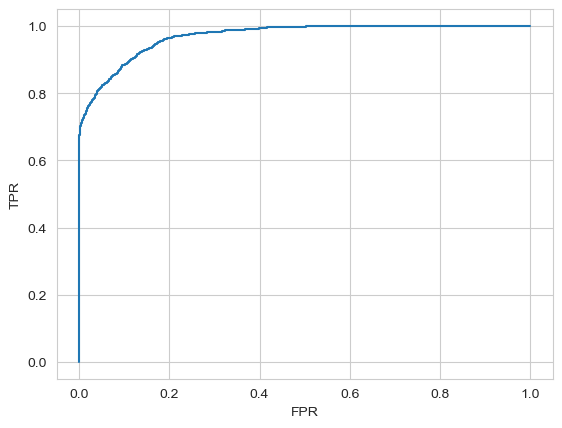

0.9693716296825429


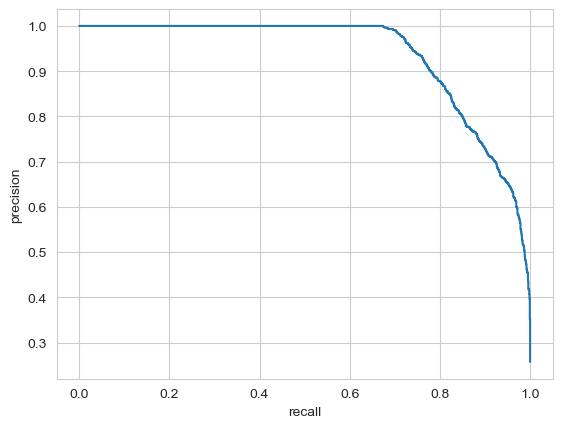

0.9360681556094995


In [116]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
output_class(pipeline, 3, title=True, stratify=True, curves=True)

Як бачимо, моделі не є ідеальними, але показують чудовий результат. Пр правильність графіків можемо судити, наприклад з того, що по другому видно, що при значенні `recall = 0.75` значення `precision = 0.91`, як і є в нашій моделі

### SVMClassifier
Найкраща модель з мультикласової класифікації:

In [117]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', svc.set_params(C=2.154434690031882))
])
output_class(pipeline, 3, title=True, stratify=True, all_metrics=True)

----------SVC(C=2.154434690031882)----------
---Null Handling v3---
Test Accuracy: 0.9181
Train Accuracy: 0.9524

Test Precision: 0.9329
Train Precision: 0.9824

Test Recall: 0.7341
Train Recall: 0.8296

Test F1: 0.8217
Train F1: 0.8995

Test ROC_AUC: 0.8579
Train ROC_AUC: 0.9122


Знову маємо відчутно вищі результати, причому збереглось приблизне порівняння з моделлю логістичної регресії.
І знову значення `Precision` значно вище, ніж значення `Recall`. Присутнє невелике перенавчання моделі

Малюємо криві для цієї моделі

----------SVC(C=2.154434690031882, probability=True)----------
---Null Handling v3---
Test Accuracy: 0.9181
Train Accuracy: 0.9524


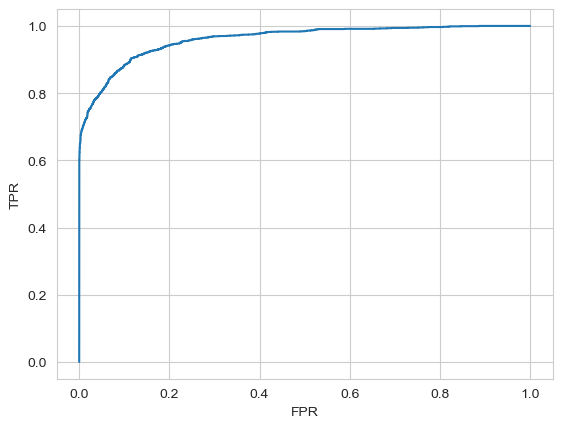

0.9603508141263264


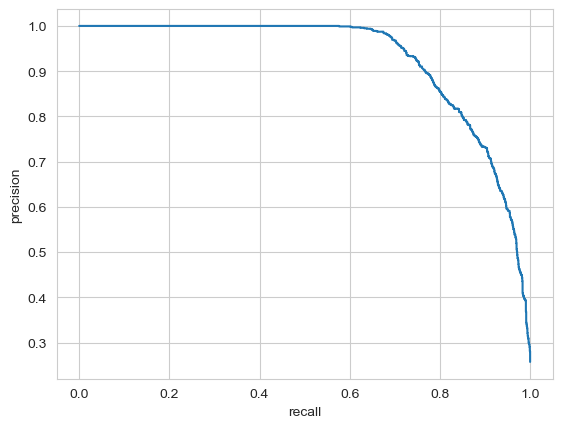

0.9267627652584085


SVC(C=2.154434690031882)

In [118]:
svc.set_params(probability=True)
output_class(pipeline, 3, title=True, stratify=True, curves=True)
svc.set_params(probability=False)

Бачимо, що `ROC` крива подібна до моделі логістичної регресії, а от `precision-recall` ще більше показує, що наша модель має значно нижчі значення `recall` в порівнянні з `precision`

Також слід зауважити, що оцінки ймовірності для моделі `SVC` можуть бути не надто точними, адже вона базується на SVM, які по стандарту не обчислюють ймовірність попадання в певний клас.

### KNN Classifier
Найкраща модель з завдання 4:

In [119]:
delete = outliers(X_nn_all_class[0][1], numeric_features, 9)
X_nn_all_class[0][1].drop(delete, inplace=True)
X_nn_all_class[0][0].drop(delete, inplace=True)
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', knn_class)
])
output_class(pipeline, 1, title=True, stratify=True, all_metrics=True)
X_nn_all_class = X_nn_all.copy()

----------KNeighborsClassifier(n_jobs=-1, n_neighbors=9, p=1)----------
---Null Handling v1---
Test Accuracy: 0.9026
Train Accuracy: 0.9227

Test Precision: 0.8984
Train Precision: 0.929

Test Recall: 0.6949
Train Recall: 0.7534

Test F1: 0.7836
Train F1: 0.832

Test ROC_AUC: 0.8341
Train ROC_AUC: 0.8669


Результати знову повторюють мультикласову класифікацію. KNN показує швидкі непогані результати, але які є гіршими в порівнянні з іншими моделями. Знову бачимо закономірність, що `Precision` значно вищий за `Recall`. Подивимось як це буде виглядати на графіках кривих

----------KNeighborsClassifier(n_jobs=-1, n_neighbors=9, p=1)----------
---Null Handling v1---
Test Accuracy: 0.9026
Train Accuracy: 0.9227


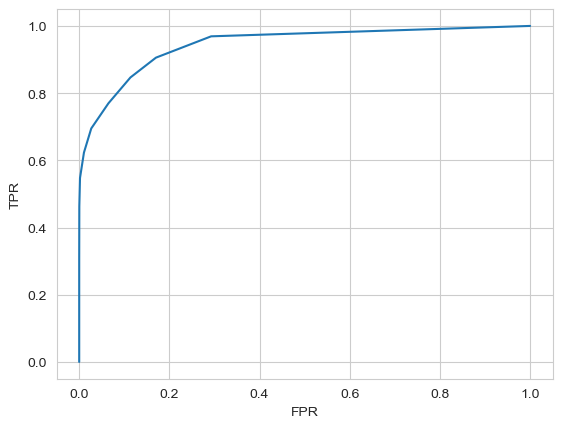

0.9447346066331639


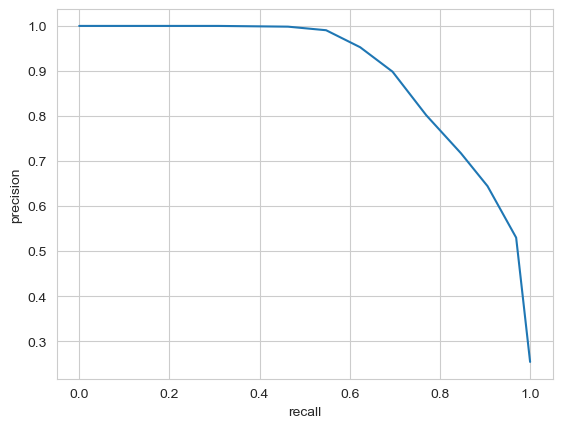

0.8983369982989816


In [120]:
output_class(pipeline, 1, title=True, stratify=True, curves=True)

Графіки доволі подібні на результати для `SVC` з незначним погіршенням у площах. Криві виглядають більш гладко

### DecisionTreeClassifier
Найкраща модель

In [121]:
column_transformer = ColumnTransformer([
    ("scaler", StandardScaler(), numeric_features)
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', dec_tree_class)
])
output_class(pipeline, 1, title=True, all_metrics=True)

----------DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       min_samples_leaf=30, random_state=4)----------
---Null Handling v1---
Test Accuracy: 0.8932
Train Accuracy: 0.9191

Test Precision: 0.8132
Train Precision: 0.8792

Test Recall: 0.7483
Train Recall: 0.7912

Test F1: 0.7794
Train F1: 0.8329

Test ROC_AUC: 0.8452
Train ROC_AUC: 0.877


Бачимо, що результати подібні до KNN, але з покращенням у `Recall`, хоча незбалансованість все ще лишається великою. Цікаво також, що ідентичні моделі залишаються найкращими (спробував повернути бінаризацію і `One-Hot`, що не дало результатів, як і раніше).

Дивимось на графііки кривих

----------DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       min_samples_leaf=30, random_state=4)----------
---Null Handling v1---
Test Accuracy: 0.8932
Train Accuracy: 0.9191


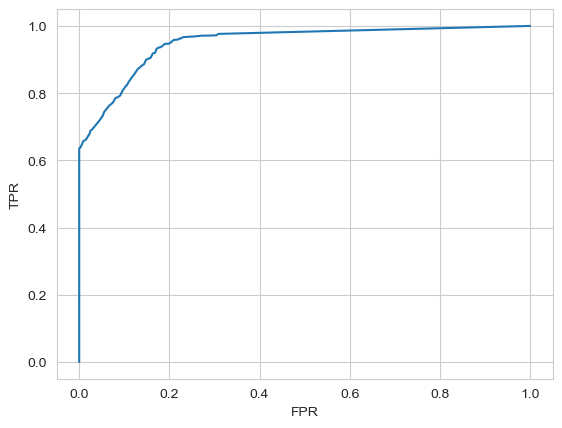

0.9504111497170238


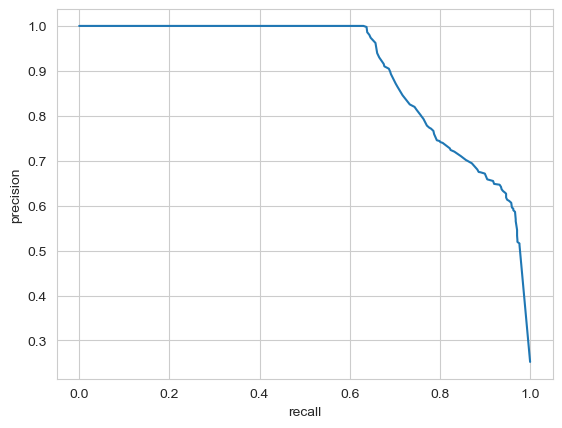

0.9037154087910337


In [122]:
output_class(pipeline, 1, title=True, curves=True)

Знову ж таки непоганий результат площ, на рівні з іншими моделями.

### RandomForestClassifier
Найкраща конфігурація моделі:

In [123]:
from sklearn.ensemble import RandomForestClassifier
forest_bin = RandomForestClassifier(random_state=4)
column_transformer = ColumnTransformer([
    ("passthrough", "passthrough", numeric_features)
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', forest_bin)
])
output_class(pipeline, 3, title=True, stratify=True, all_metrics=True)

----------RandomForestClassifier(random_state=4)----------
---Null Handling v3---
Test Accuracy: 0.9224
Train Accuracy: 1.0

Test Precision: 0.9417
Train Precision: 1.0

Test Recall: 0.7442
Train Recall: 1.0

Test F1: 0.8313
Train F1: 1.0

Test ROC_AUC: 0.8641
Train ROC_AUC: 1.0


In [124]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical1),
    ("scaler", StandardScaler(), numeric_features),
    ('binner', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', forest_class.set_params(criterion='entropy', max_depth=12, max_features='auto',
                       min_samples_split=5, n_estimators=200, random_state=4))
])
output_class(pipeline, 3, title=True, stratify=True, all_metrics=True)

----------RandomForestClassifier(criterion='entropy', max_depth=12, max_features='auto',
                       min_samples_split=5, n_estimators=200, random_state=4)----------
---Null Handling v3---
Test Accuracy: 0.922
Train Accuracy: 0.9428

Test Precision: 0.9915
Train Precision: 1.0

Test Recall: 0.7027
Train Recall: 0.7775

Test F1: 0.8225
Train F1: 0.8748

Test ROC_AUC: 0.8503
Train ROC_AUC: 0.8887


Тут порівняли дві моделі, одна з яких на дефолтному лісі і давала перенавчання в завданні 4, а друга з підібраними параметрами і без перенавчання. Результати, як тоді, так і зараз майже однакові. Цікаво що конфігурована модель дає майже ідеальний `Precision`, щоправда, як і в попередніх моделях, він регулюється низьким `Recall`. Подивимсоь на графіки кривих для другої моделі

----------RandomForestClassifier(criterion='entropy', max_depth=12, max_features='auto',
                       min_samples_split=5, n_estimators=200, random_state=4)----------
---Null Handling v3---
Test Accuracy: 0.922
Train Accuracy: 0.9428


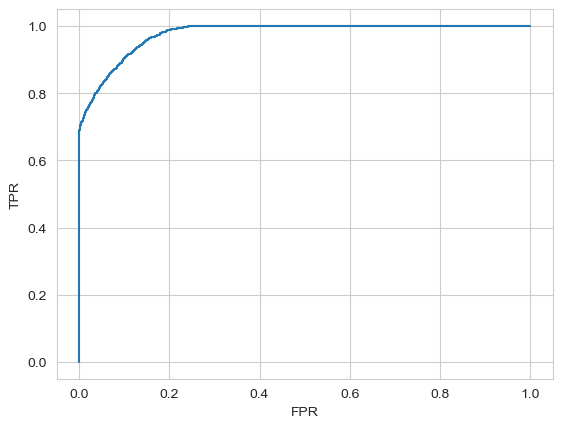

0.9764091289374865


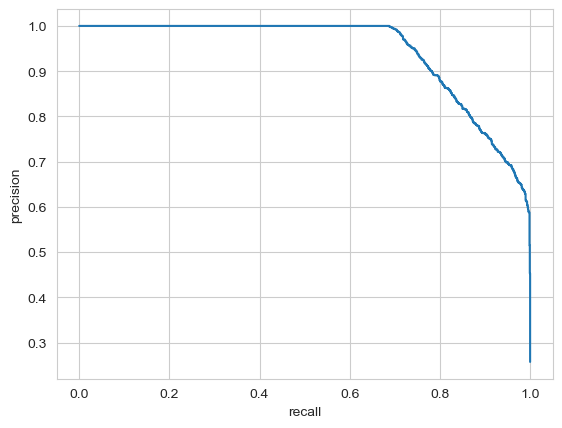

0.9446967616815096


In [125]:
output_class(pipeline, 3, title=True, stratify=True, curves=True)

Графіки виглядають дуже одібно до логістичної регресії. Покращились обидві площі, що можна побачити і по кращих метриках в порівнянні.

### Висновок.
Результати залишились майже ідентичними до завдання 4. Провели більший аналіз, розглянувши додаткові метрики і площі під кривими `ROC` i `Precision-Recall`. Вони також були відповідними до точності. Найкращою моделлю залишилась `RandomForestClassifier`. Цікаов, що у всіх моделей показники `Precision` значно вищі, ніж  `Recall`

### 7. Зберегти результати роботи у jupyter-ноутбук. Ноутбук повинен бути збережений у стані в якому усі клітинки запущені і не містити помилок. Формат назви файлу `ЕКЗ_Прізвище_Ім'я.ipynb`. Окремо додати файли `predictions_reg.csv` та `predictions_clf.csv`.
